## Вводные по кейсу

# Описание данных

## Таблица `Users`

| Поле              | Описание                                       |
|-------------------|------------------------------------------------|
| `user_id`         | Уникальный идентификатор пользователя.         |
| `registration_date` | Дата регистрации пользователя.                |
| `age`             | Возраст пользователя.                          |
| `gender`          | Пол.                                |
| `region`          | Регион.                                        |
| `acq_channel`     | Канал привлечения.                             |
| `buyer_segment`   | Сегмент покупателя.                            |
| `cohort_week`     | Неделя привлечения.|
| `cohort_month`    | Месяц привлечения. |

---

## Таблица `Events`

| Поле          | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| `event_id`    | Уникальный идентификатор события.                                        |
| `user_id`     | Идентификатор пользователя.                                              |
| `event_date`  | Дата события.                                                            |
| `event_type`  | Тип события.   |
| `os`          | Операционная система.               |
| `device`      | Тип устройства.                                |
| `product_name`| Наименование товара, к которому относится событие (если применимо).      |
| `event_week`  | Неделя события.                                          |
| `event_month` | Месяц события .                                           |

---

## Таблица `Orders`

| Поле          | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| `order_id`    | Уникальный идентификатор заказа.                                         |
| `user_id`     | Идентификатор пользователя, который сделал заказ |
| `order_date`  | Дата и время оформления заказа.                                          |
| `product_name`| Наименование товара.                                                     |
| `quantity`    | Количество единиц товара в заказе.                                       |
| `unit_price`  | Цена за одну единицу товара.                                             |
| `total_price` | Итоговая сумма заказа.                                                   |
| `category_name` | Наименование категории товара.                                         |
| `order_week`  | Неделя заказа.                                           |
| `order_month` | Месяц заказа.                                            |


## Таблица `Campaign_costs`

| Поле         | Описание                                                                 |
|--------------|--------------------------------------------------------------------------|
| `acq_channel`| Канал привлечения.  |
| `spend_month`| Месяц, в который был потрачен бюджет (отражает период, в котором были привлечены пользователи)                      |
| `budget`     | Маркетинговый бюджет (в денежном выражении), потраченный на данный канал в указанном месяце.                           |



## Описание событий

| Событие             | Описание                                                                                  |
|---------------------|-------------------------------------------------------------------------------------------|
| `page_view`         | Открытие любой страницы сайта или приложения пользователем.                                |
| `product_view`      | Просмотр страницы конкретного товара.                                                     |
| `product_click`     | Клик по товару (например, из списка товаров или на баннере).                              |
| `add_to_cart`       | Добавление товара в корзину.                                                              |
| `remove_from_cart`  | Удаление товара из корзины.                                                               |
| `search`            | Выполнение поиска по сайту или приложению.                                                |
| `filter_apply`      | Применение фильтра (например, по цене, бренду, категории).                                |
| `checkout_start`    | Начало оформления заказа (переход к оформлению корзины).                                  |
| `checkout_complete` | Завершение оформления заказа (не гарантирует покупку, покупка зависит от факта оплаты).                                          |
| `user_login`        | Вход пользователя в личный кабинет или аккаунт.                                           |
| `user_logout`       | Выход пользователя из аккаунта.                                                           |
| `wishlist_add`      | Добавление товара в список желаемого (wishlist).                                          |
| `category_view`     | Просмотр страницы категории товаров.                                                      |
| `banner_click`      | Клик по рекламному баннеру на сайте или в приложении.                                     |
| `promo_view`        | Просмотр промо-акции или специального предложения.                                        |


## Выручка маркетплейса = 5% от total_price

# Блок кода и расчета метрик

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest


In [ ]:
pa_marketplace_orders = pd.read_csv('marketplace_orders.csv', parse_dates= ['order_date', 'order_week', 'order_month'])
pa_marketplace_campaign_costs = pd.read_csv('marketplace_campaign_costs.csv', parse_dates= ['spend_month'])
pa_marketplace_users = pd.read_csv('marketplace_users.csv', parse_dates= ['registration_date', 'cohort_week', 'cohort_month'])
pa_marketplace_events = pd.read_csv('marketplace_events.csv', parse_dates= ['event_date', 'event_week', 'event_month'])

In [3]:
pa_marketplace_orders.head()

,order_id,user_id,order_date,product_name,quantity,unit_price,total_price,category_name,order_week,order_month
0,1,3,2024-01-19 01:52:52,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
1,2,3,2024-01-19 01:52:52,Молоток слесарный,1,11340.38,11340.38,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
2,3,3,2024-01-19 01:52:52,Секатор садовый,2,10892.09,21784.18,Инструменты и садовый инвентарь,2024-01-15,2024-01-01
3,4,3,2024-01-25 13:59:38,Шуруповерт,2,5539.13,11078.26,Инструменты и садовый инвентарь,2024-01-22,2024-01-01
4,5,3,2024-01-25 13:59:38,Чай черный,1,2099.59,2099.59,Продукты питания,2024-01-22,2024-01-01


In [4]:
pa_marketplace_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31357 entries, 0 to 31356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       31357 non-null  int64         
 1   user_id        31357 non-null  int64         
 2   order_date     31357 non-null  datetime64[ns]
 3   product_name   31357 non-null  object        
 4   quantity       31357 non-null  int64         
 5   unit_price     31357 non-null  float64       
 6   total_price    31357 non-null  float64       
 7   category_name  31357 non-null  object        
 8   order_week     31357 non-null  datetime64[ns]
 9   order_month    31357 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 2.4+ MB


In [5]:
(pd.DataFrame({'Количество пропусков': pa_marketplace_orders.isnull().sum(), 
               'Доля пропусков': pa_marketplace_orders.isnull().mean().round(4), 
               'Количество дубликатов': pa_marketplace_orders.duplicated().sum()}).style.background_gradient(cmap='coolwarm'))

,Количество пропусков,Доля пропусков,Количество дубликатов
order_id,0,0.000000,0
user_id,0,0.000000,0
order_date,0,0.000000,0
product_name,0,0.000000,0
quantity,0,0.000000,0
unit_price,0,0.000000,0
total_price,0,0.000000,0
category_name,0,0.000000,0
order_week,0,0.000000,0
order_month,0,0.000000,0


In [6]:
print(f'Количество неявных дубликатов: {pa_marketplace_orders.duplicated(subset= pa_marketplace_orders.columns[:]).sum()}')


Количество неявных дубликатов: 0


In [7]:
print(f"Период дат с {pa_marketplace_orders['order_date'].min()} по {pa_marketplace_orders['order_date'].max()}, даты соответствуют. В данных нет других событий, кроме нашего периода")

Период дат с 2024-01-01 08:03:45 по 2024-12-31 23:00:53, даты соответствуют. В данных нет других событий, кроме нашего периода


In [8]:
pa_marketplace_events.head()

,event_id,user_id,event_date,event_type,os,device,product_name,event_week,event_month
0,3132,100,2024-01-01,page_view,iOS,mobile,NaN,2024-01-01,2024-01-01
1,3133,100,2024-01-01,product_view,iOS,mobile,Шорты для тренировок,2024-01-01,2024-01-01
2,3134,100,2024-01-01,product_click,iOS,mobile,Куртка детская,2024-01-01,2024-01-01
3,3135,100,2024-01-01,add_to_cart,iOS,mobile,Балетки классические,2024-01-01,2024-01-01
4,3136,100,2024-01-01,checkout_start,iOS,mobile,NaN,2024-01-01,2024-01-01


In [9]:
pa_marketplace_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785859 entries, 0 to 785858
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      785859 non-null  int64         
 1   user_id       785859 non-null  int64         
 2   event_date    785859 non-null  datetime64[ns]
 3   event_type    785859 non-null  object        
 4   os            785859 non-null  object        
 5   device        785859 non-null  object        
 6   product_name  385740 non-null  object        
 7   event_week    785859 non-null  datetime64[ns]
 8   event_month   785859 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 54.0+ MB


In [10]:
(pd.DataFrame({'Количество пропусков': pa_marketplace_events.isnull().sum(), 
               'Доля пропусков': pa_marketplace_events.isnull().mean().round(4), 
               'Количество дубликатов': pa_marketplace_events.duplicated().sum()}).style.background_gradient(cmap='coolwarm'))

,Количество пропусков,Доля пропусков,Количество дубликатов
event_id,0,0.000000,0
user_id,0,0.000000,0
event_date,0,0.000000,0
event_type,0,0.000000,0
os,0,0.000000,0
device,0,0.000000,0
product_name,400119,0.509100,0
event_week,0,0.000000,0
event_month,0,0.000000,0


In [11]:
print(f'Количество неявных дубликатов: {pa_marketplace_events.duplicated(subset= pa_marketplace_events.columns[:]).sum()}')


Количество неявных дубликатов: 0


In [12]:
print(f"Период дат с {pa_marketplace_events['event_date'].min()} по {pa_marketplace_events['event_date'].max()}, даты соответствуют. В данных нет других событий, кроме нашего периода")

Период дат с 2024-01-01 00:00:00 по 2024-12-31 00:00:00, даты соответствуют. В данных нет других событий, кроме нашего периода


In [13]:
pa_marketplace_users.head()

,user_id,registration_date,age,gender,region,acq_channel,buyer_segment,cohort_week,cohort_month
0,1,2024-01-01 00:47:00,35,M,Москва,Google Ads,regular,2024-01-01,2024-01-01
1,2,2024-01-01 19:01:00,53,M,Москва,Email Marketing,rare,2024-01-01,2024-01-01
2,3,2024-01-01 04:13:00,66,F,Санкт-Петербург,Google Ads,regular,2024-01-01,2024-01-01
3,4,2024-01-01 17:18:00,58,M,Краснодар,Affiliate,one_time,2024-01-01,2024-01-01
4,5,2024-01-01 08:29:00,58,F,Другие регионы,Google Ads,regular,2024-01-01,2024-01-01


In [14]:
pa_marketplace_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44151 entries, 0 to 44150
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            44151 non-null  int64         
 1   registration_date  44151 non-null  datetime64[ns]
 2   age                44151 non-null  int64         
 3   gender             44151 non-null  object        
 4   region             44151 non-null  object        
 5   acq_channel        44151 non-null  object        
 6   buyer_segment      44151 non-null  object        
 7   cohort_week        44151 non-null  datetime64[ns]
 8   cohort_month       44151 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 3.0+ MB


In [15]:
(pd.DataFrame({'Количество пропусков': pa_marketplace_users.isnull().sum(), 
               'Доля пропусков': pa_marketplace_users.isnull().mean().round(4), 
               'Количество дубликатов': pa_marketplace_users.duplicated().sum()}).style.background_gradient(cmap='coolwarm'))

,Количество пропусков,Доля пропусков,Количество дубликатов
user_id,0,0.000000,0
registration_date,0,0.000000,0
age,0,0.000000,0
gender,0,0.000000,0
region,0,0.000000,0
acq_channel,0,0.000000,0
buyer_segment,0,0.000000,0
cohort_week,0,0.000000,0
cohort_month,0,0.000000,0


In [16]:
print(f'Количество неявных дубликатов: {pa_marketplace_users.duplicated(subset= pa_marketplace_users.columns[:]).sum()}')


Количество неявных дубликатов: 0


In [17]:
print(f"Период дат с {pa_marketplace_users['registration_date'].min()} по {pa_marketplace_users['registration_date'].max()}, даты соответствуют. В данных нет других событий, кроме нашего периода")

Период дат с 2024-01-01 00:07:00 по 2024-12-31 23:44:00, даты соответствуют. В данных нет других событий, кроме нашего периода


In [18]:
pa_marketplace_campaign_costs.head()

,Unnamed: 0,acq_channel,spend_month,budget
0,0,Affiliate,2024-01-01,179343.3875
1,1,Affiliate,2024-02-01,175488.4875
2,2,Affiliate,2024-03-01,164543.4750
3,3,Affiliate,2024-04-01,186869.9750
4,4,Affiliate,2024-05-01,166443.7750


In [19]:
pa_marketplace_campaign_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   88 non-null     int64         
 1   acq_channel  88 non-null     object        
 2   spend_month  88 non-null     datetime64[ns]
 3   budget       88 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.9+ KB


In [20]:
(pd.DataFrame({'Количество пропусков': pa_marketplace_campaign_costs.isnull().sum(), 
               'Доля пропусков': pa_marketplace_campaign_costs.isnull().mean().round(4), 
               'Количество дубликатов': pa_marketplace_campaign_costs.duplicated().sum()}).style.background_gradient(cmap='coolwarm'))

,Количество пропусков,Доля пропусков,Количество дубликатов
Unnamed: 0,0,0.000000,0
acq_channel,0,0.000000,0
spend_month,0,0.000000,0
budget,0,0.000000,0


In [21]:
print(f'Количество неявных дубликатов: {pa_marketplace_campaign_costs.duplicated(subset= pa_marketplace_campaign_costs.columns[:]).sum()}')


Количество неявных дубликатов: 0


В целом все данные скаченные из базы данных целые и без ошибок. Есть пропуски в датасете `pa_marketplace_events`, столбец `product_name`, количество 400119. В остальном всё хорошо.

### 2. Построить обзор ключевых метрик

На этом этапе вам нужно выполнить верхнеуровневую оценку состояния продукта с помощью собранных витрин. Бизнес просит просто оценить текущее состояние — без глубокой сегментации и оценки сложных метрик.

Выручка бизнеса — 5% комиссии от стоимости любой продажи.

Посмотрите на общую динамику ключевых метрик: например, Revenue, ARPU или ARPPU, MAU, WAU, DAU, AOV, Retention, CTR, CR в заказ. Следовать этому списку необязательно, исходите из данных.

Ваша цель — быстро получить целостную картину, не применяя сегментацию и не рассматривая глубокие срезы. Определите, соответствует ли продукт базовым ожиданиям, виден ли рост, есть ли тревожные сигналы.

Результатом задания будет ваш вывод о динамике основных продуктовых метрик.

In [22]:
pa_marketplace_orders['date'] = pd.to_datetime(pa_marketplace_orders['order_date']).dt.date
pa_marketplace_orders['revenue'] = (pa_marketplace_orders['total_price'] * 0.05).astype('float')

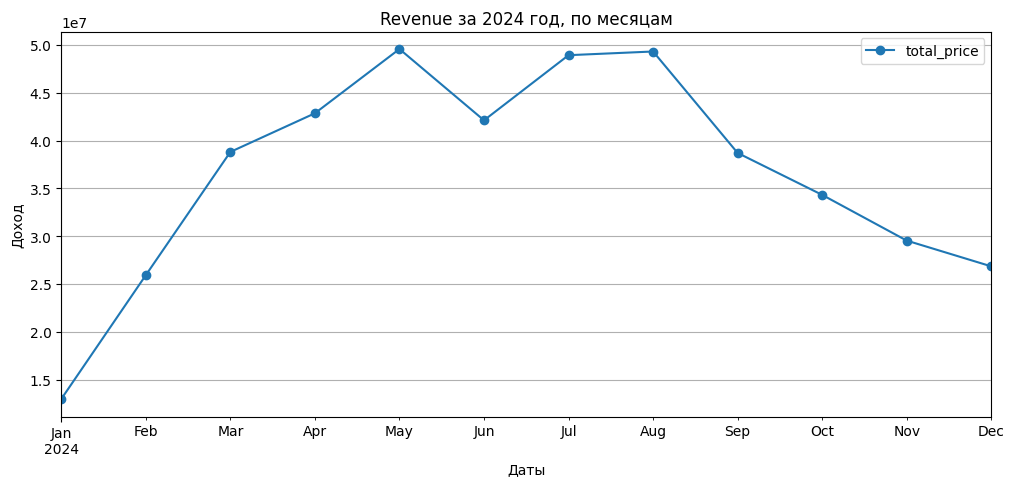

In [23]:
revenue_2024 = pa_marketplace_orders.groupby('order_month')['total_price'].sum().reset_index()

revenue_2024.plot(kind= 'line',
                  x= 'order_month',
                  y= 'total_price',
                  marker= 'o',
                  figsize=(12, 5))

plt.title('Revenue за 2024 год, по месяцам')
plt.ylabel('Доход')
plt.xlabel('Даты')

plt.grid()
plt.show()


График показывает доход за 2024 год демонстрирует значительные колебания: начиная с минимального значения в январе (около 1.5), он достигает пика в мае и июле, августе (около 5), а затем постепенно снижается до минимального уровня в декабре (около 2.5).



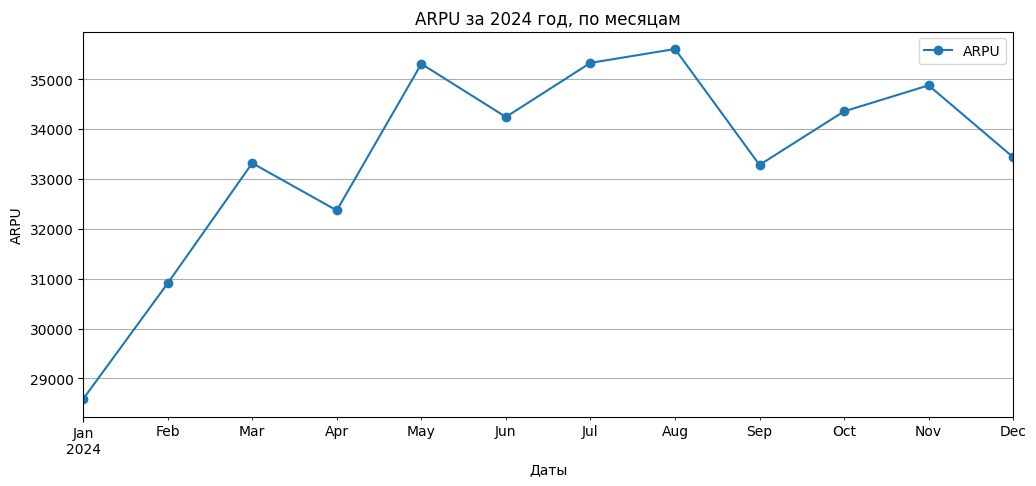

In [24]:
users_count = pa_marketplace_orders.groupby('order_month')['user_id'].nunique().reset_index()
revenue_sum = pa_marketplace_orders.groupby('order_month')['total_price'].sum().reset_index()

arpu_2024 = revenue_sum.merge(users_count, on= 'order_month')
arpu_2024['ARPU'] = arpu_2024['total_price'] / users_count['user_id']

arpu_2024.plot(kind= 'line',
                  x= 'order_month',
                  y= 'ARPU',
                  marker= 'o',
                  figsize=(12, 5))

plt.title('ARPU за 2024 год, по месяцам')
plt.ylabel('ARPU')
plt.xlabel('Даты')

plt.grid()
plt.show()

- Январь: ARPU начинается с низкого уровня, около 29000 тысяч.
- Февраль — Март: Наблюдается значительный рост ARPU.
- Апрель — Май: ARPU достигает пика в мае, превышая 35000.
- Июнь — Июль: Небольшое снижение ARPU, но он остается на высоком уровне.
- Август — Сентябрь: ARPU снова растет, достигая уровня около 35000.
- Октябрь — Декабрь: Резкое снижение ARPU, возвращаясь к уровню января.

График показывает сезонные колебания ARPU, с пиками в мае и августе, и значительным снижением в конце года.

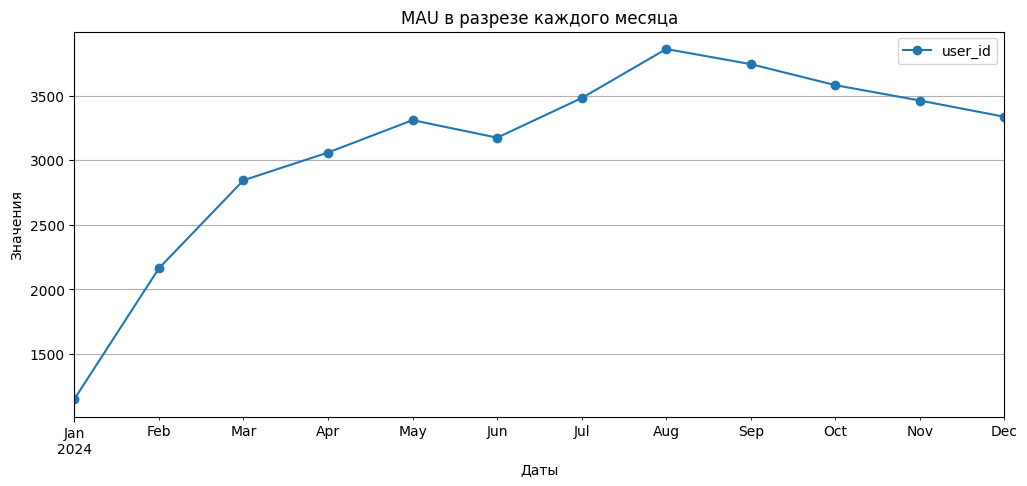

In [25]:
mau_2024_all = pa_marketplace_events.groupby('event_month')['user_id'].nunique().reset_index()


mau_2024_all.plot(kind= 'line',
                  x= 'event_month',
                  y= 'user_id',
                  marker= 'o',
                  figsize=(12, 5))

plt.title('MAU в разрезе каждого месяца')
plt.xlabel('Даты')
plt.ylabel('Значения')

plt.grid()
plt.show()

- Январь: MAU начинается с низкого уровня, около 1500 пользователей.
- Февраль — Март: Наблюдается значительный рост MAU.
- Апрель — Май: MAU достигает пика в мае, превышая 3500  пользователей.
- Июнь — Июль: Небольшое снижение MAU, но он остается на высоком уровне.
- Август — Сентябрь: MAU снова растет, достигая уровня около 3500 пользователей.
- Октябрь — Декабрь: Резкое снижение MAU, возвращаясь к уровню июля.

График показывает сезонные колебания MAU, с пиками в мае и августе, и значительным снижением в конце года

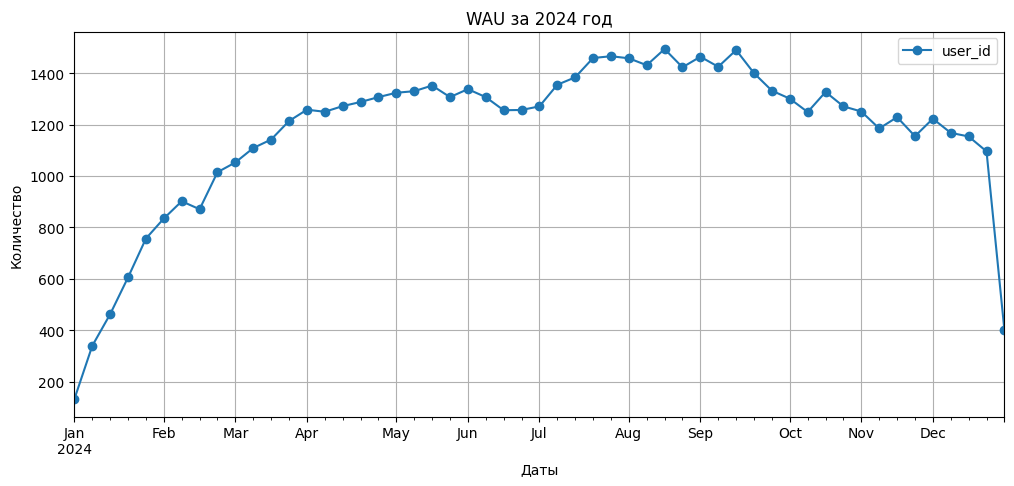

In [26]:
wau_2024_all = (
    pa_marketplace_events.groupby('event_week')['user_id']
    .nunique()
    .reset_index()
)

wau_2024_all.plot(kind= 'line',
                  x= 'event_week',
                  y= 'user_id',
                  marker= 'o',
                  figsize=(12, 5))

plt.title('WAU за 2024 год')
plt.ylabel('Количество')
plt.xlabel('Даты')

plt.grid()
plt.show()

- Январь: WAU начинается с низкого уровня, около 200 пользователей.
- Февраль — Март: Наблюдается значительный рост WAU.
- Апрель — Май: WAU достигает пика в мае, превышая 1400 пользователей.
- Июнь — Июль: Небольшое снижение WAU, но он остается на высоком уровне.
- Август — Сентябрь: WAU снова растет, достигая уровня около 1400 пользователей.
- Октябрь — Декабрь: Резкое снижение WAU, возвращаясь к уровню марта.

График показывает сезонные колебания WAU, с пиками в мае и августе, и значительным снижением в конце года.

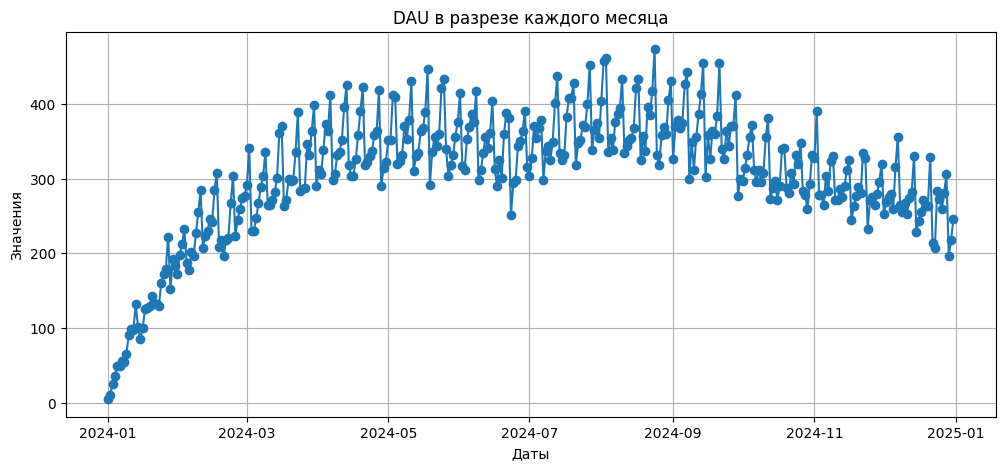

In [27]:
pa_marketplace_events['days'] = pd.to_datetime(pa_marketplace_events['event_date']).dt.date
dau = pa_marketplace_events.groupby(['days'])['user_id'].nunique().reset_index()

plt.subplots(figsize=(12,5))

plt.plot(dau['days'], dau['user_id'], marker= 'o')

plt.title('DAU в разрезе каждого месяца')
plt.xlabel('Даты')
plt.ylabel('Значения')

plt.grid()
plt.show()

- Январь: DAU начинается с низкого уровня, около 10 пользователей.
- Февраль — Март: Наблюдается значительный рост DAU.
- Апрель — Май: DAU достигает пика в мае, превышая 450 пользователей.
- Июнь — Июль: Небольшое снижение DAU, но он остается на высоком уровне.
- Август — Сентябрь: DAU снова растет, достигая уровня около 450 пользователей.
- Октябрь — Декабрь: Резкое снижение DAU.

График показывает сезонные колебания DAU, с пиками в мае и августе, и значительным снижением в конце года.

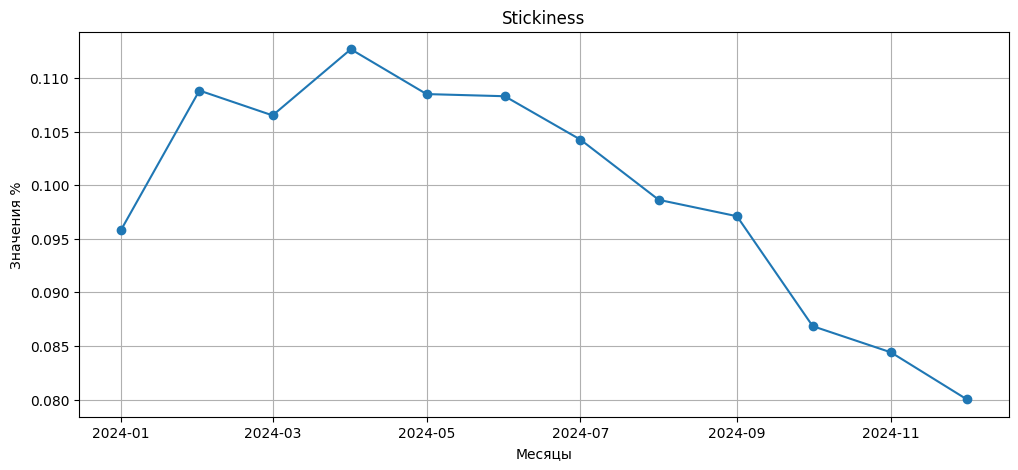

In [28]:
dau['days'] = pd.to_datetime(dau['days'])
dau['event_month'] = dau['days'].dt.to_period('M').dt.to_timestamp()
dau_avg = dau.groupby('event_month')['user_id'].mean().reset_index()

# Считаем общий Stickiness
stickiness = pd.merge(mau_2024_all, dau_avg, how='left', on='event_month')
stickiness['stick'] = stickiness['user_id_y']/stickiness['user_id_x']

plt.subplots(figsize=(12,5))

plt.plot(stickiness['event_month'], stickiness['stick'], marker= 'o')

plt.title('Stickiness')
plt.xlabel('Месяцы')
plt.ylabel('Значения %')

plt.grid()
plt.show()

- Январь: Stickiness начинается с низкого уровня, около 0.080%.
- Февраль — Март: Наблюдается значительный рост Stickiness.
- Апрель — Май: Stickiness достигает пика в мае, превышая 0.110%.
- Июнь — Июль: Небольшое снижение Stickiness, но он остается на высоком уровне.
- Август — Сентябрь: Stickiness снова растет, достигая уровня около 0.110%.
- Октябрь — Декабрь: Резкое снижение Stickiness.

График показывает сезонные колебания Stickiness, с пиками в мае и августе, и значительным снижением в конце года.

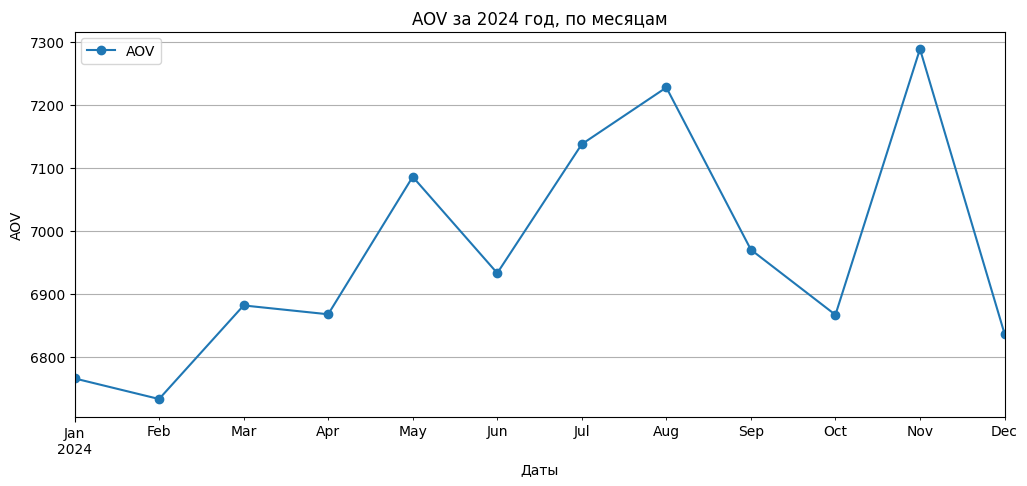

In [29]:
total_order = pa_marketplace_orders.groupby('order_month')['quantity'].sum()

aov_2024 = revenue_sum.merge(total_order, on= 'order_month')
aov_2024['AOV'] = aov_2024['total_price'] / aov_2024['quantity']

aov_2024.plot(kind= 'line',
                  x= 'order_month',
                  y= 'AOV',
                  marker= 'o',
                  figsize=(12, 5))

plt.title('AOV за 2024 год, по месяцам')
plt.ylabel('AOV')
plt.xlabel('Даты')

plt.grid()
plt.show()

- Январь: AOV начинается с низкого уровня, около 6800.
- Февраль — Март: Наблюдается значительный рост AOV.
- Апрель — Май: AOV достигает пика в мае, превышая 7300 .
- Июнь — Июль: Небольшое снижение AOV, но он остается на высоком уровне.
- Август — Сентябрь: AOV снова растет, достигая уровня около 7300.
- Октябрь — Декабрь: Резкое снижение AOV, возвращаясь к уровню января.

График показывает сезонные колебания AOV, с пиками в мае и августе, и значительным снижением в конце года.

### 3. Оценка метрик монетизации и юнит-экономики

Выполните анализ монетизации. Определите, сколько зарабатывает продукт и сколько тратит на привлечение.

Важны как агрегированные метрики (ARPU, AOV), так и показатели эффективности (CAC, ROI, Payback Period).

Сформулируйте первые выводы по результатам анализа метрик. Сделайте это в формате записки для заказчика. Изложите все основные результаты так, чтобы прослеживалась связь между мыслями. Не пишите много — заказчик не будет читать записку полностью, а просто просмотрит.

Напишите выводы в конце блока, чтобы заказчик мог быстро ознакомиться с основными результатами.

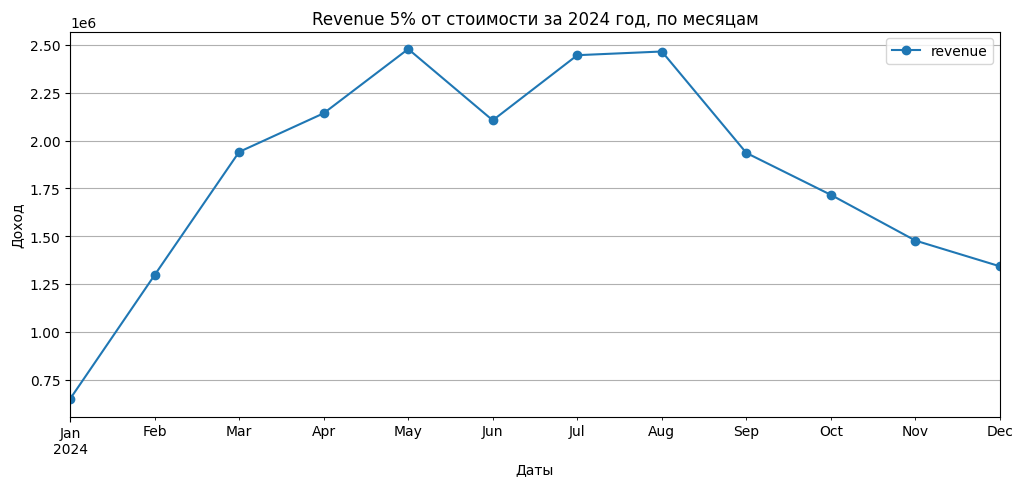

In [30]:
revenue_2024 = pa_marketplace_orders.groupby('order_month')['revenue'].sum().reset_index()

revenue_2024.plot(kind= 'line',
                  x= 'order_month',
                  y= 'revenue',
                  marker= 'o',
                  figsize=(12, 5))

plt.title('Revenue 5% от стоимости за 2024 год, по месяцам')
plt.ylabel('Доход')
plt.xlabel('Даты')

plt.grid()
plt.show()

- Январь: Revenue начинается с низкого уровня, около 0.75.
- Февраль — Март: Наблюдается значительный рост Revenue.
- Апрель — Май: Revenue достигает пика в мае, превышая 2.50.
- Июнь — Июль: Небольшое снижение Revenue, но он остается на высоком уровне.
- Август — Сентябрь: Revenue снова растет, достигая уровня около 2.50.
- Октябрь — Декабрь: Резкое снижение Revenue, возвращаясь к уровню февраля.

График показывает сезонные колебания Revenue, с пиками в мае и августе, и значительным снижением в конце года.

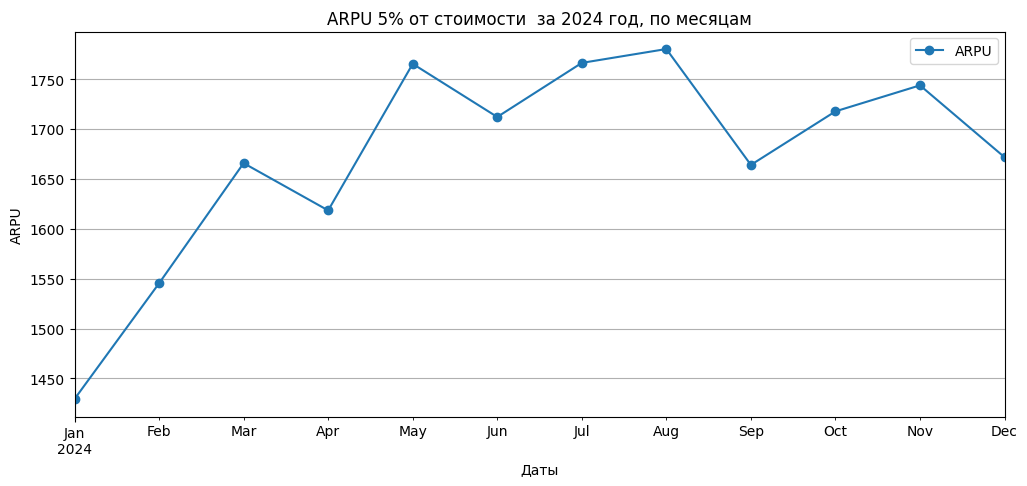

In [31]:
users_count = pa_marketplace_orders.groupby('order_month')['user_id'].nunique().reset_index()
revenue_sum = pa_marketplace_orders.groupby('order_month')['revenue'].sum().reset_index()

arpu_2024 = revenue_sum.merge(users_count, on= 'order_month')
arpu_2024['ARPU'] = arpu_2024['revenue'] / users_count['user_id']

arpu_2024.plot(kind= 'line',
                  x= 'order_month',
                  y= 'ARPU',
                  marker= 'o',
                  figsize=(12, 5))

plt.title('ARPU 5% от стоимости  за 2024 год, по месяцам')
plt.ylabel('ARPU')
plt.xlabel('Даты')

plt.grid()
plt.show()

- Январь: ARPU начинается с низкого уровня, около 1450.
- Февраль — Март: Наблюдается значительный рост ARPU.
- Апрель — Май: ARPU достигает пика в мае, превышая 1750 .
- Июнь — Июль: Небольшое снижение ARPU, но он остается на высоком уровне.
- Август — Сентябрь: ARPU снова растет, достигая уровня около 1750 .
- Октябрь — Декабрь: Резкое снижение ARPU, возвращаясь к уровню марта.

График показывает сезонные колебания ARPU, с пиками в мае и августе, и значительным снижением в конце года.

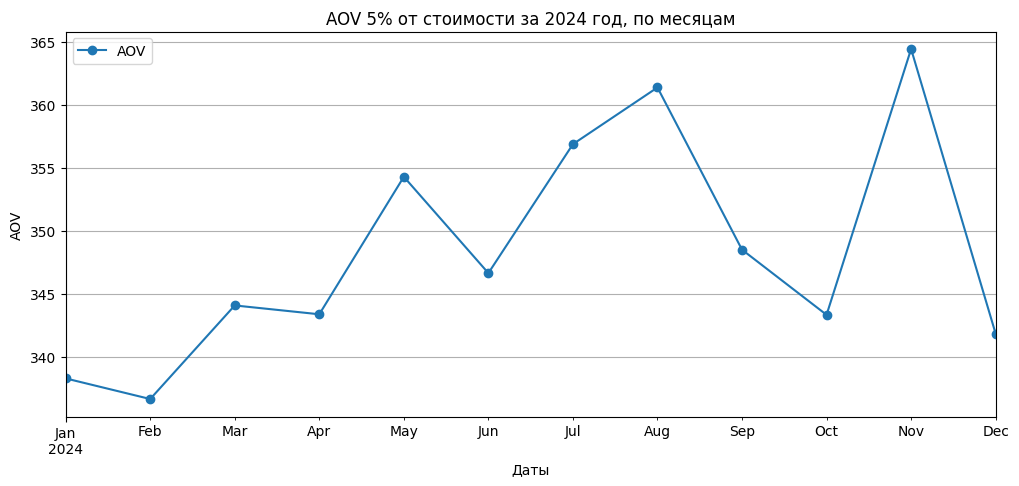

In [32]:
total_order = pa_marketplace_orders.groupby('order_month')['quantity'].sum()

aov_2024 = revenue_sum.merge(total_order, on= 'order_month')
aov_2024['AOV'] = aov_2024['revenue'] / aov_2024['quantity']

aov_2024.plot(kind= 'line',
                  x= 'order_month',
                  y= 'AOV',
                  marker= 'o',
                  figsize=(12, 5))

plt.title('AOV 5% от стоимости за 2024 год, по месяцам')
plt.ylabel('AOV')
plt.xlabel('Даты')

plt.grid()
plt.show()

- Январь: AOV начинается с низкого уровня, около 340.
- Февраль — Март: Наблюдается значительный рост AOV.
- Апрель — Май: AOV достигает пика в мае, превышая 365.
- Июнь — Июль: Небольшое снижение AOV, но он остается на высоком уровне.
- Август — Сентябрь: AOV снова растет, достигая уровня около 365.
- Октябрь — Декабрь: Резкое снижение AOV, возвращаясь к уровню апреля.

График показывает сезонные колебания AOV, с пиками в мае и августе, и значительным снижением в конце года.

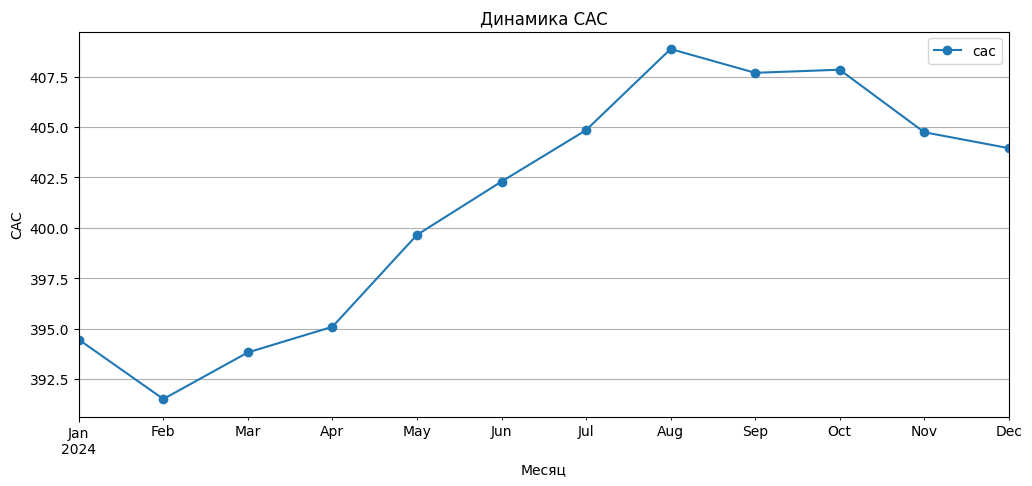

In [33]:
total_cost = pa_marketplace_campaign_costs.groupby('spend_month')['budget'].sum().reset_index()
total_users_camp = pa_marketplace_users.groupby('cohort_month')['user_id'].nunique().reset_index()

cac = total_users_camp.merge(total_cost[:-1], left_on= 'cohort_month', right_on= 'spend_month')
cac['cac'] = cac['budget'] / cac['user_id']

cac.plot(kind= 'line',
                  x= 'cohort_month',
                  y= 'cac',
                  marker= 'o',
                  figsize=(12, 5))

plt.title('Динамика CAC')
plt.xlabel('Месяц')
plt.ylabel('CAC')

plt.grid()
plt.show()

- Январь: CAC начинается с низкого уровня, около 395 .
- Февраль — Март: Наблюдается значительный рост CAC.
- Апрель — Май: CAC достигает пика в мае, превышая 407.5 .
- Июнь — Июль: Небольшое снижение CAC, но он остается на высоком уровне.
- Август — Сентябрь: CAC снова растет, достигая уровня около 407.5 .
- Октябрь — Декабрь: Резкое снижение CAC.

График показывает сезонные колебания CAC, с пиками в мае и августе, и значительным снижением в конце года.

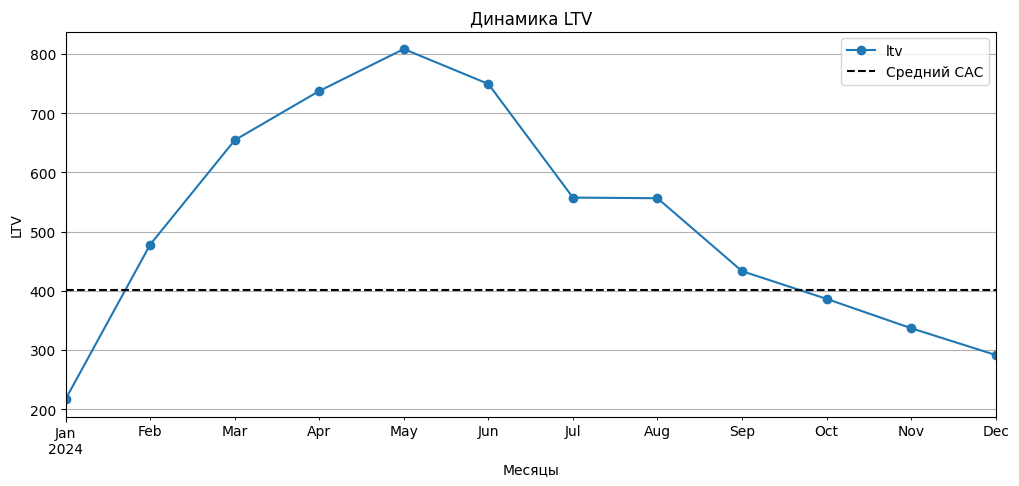

In [34]:
total_revenue = pa_marketplace_orders.groupby('order_month')['revenue'].sum().reset_index()
cac = cac.merge(total_revenue, left_on= 'cohort_month', right_on= 'order_month')

cac['ltv'] = cac['revenue'] / cac['user_id']

cac.plot(kind= 'line',
                  x= 'cohort_month',
                  y= 'ltv',
                  marker= 'o',
                  figsize=(12, 5))
plt.axhline(y= cac['cac'].mean(), color= 'black', linestyle= '--', label= 'Средний САС')

plt.title('Динамика LTV')
plt.xlabel('Месяцы')
plt.ylabel('LTV')

plt.legend()
plt.grid()
plt.show()

- Рост LTV в начале года: В январе LTV находится на низком уровне, но затем начинает быстро расти, достигая пика в мае. Это может указывать на успешные маркетинговые кампании или сезонные факторы, которые способствуют увеличению ценности клиентов.
- Падение LTV после мая: После достижения пика в мае, LTV начинает снижаться, что может быть связано с завершением маркетинговых акций, снижением активности клиентов или другими факторами.

График демонстрирует динамику LTV и Payback Period в течение года, показывая рост и падение LTV, а также стабильность периода возврата. Под конец года, начинаются завышенные траты на рекламу.

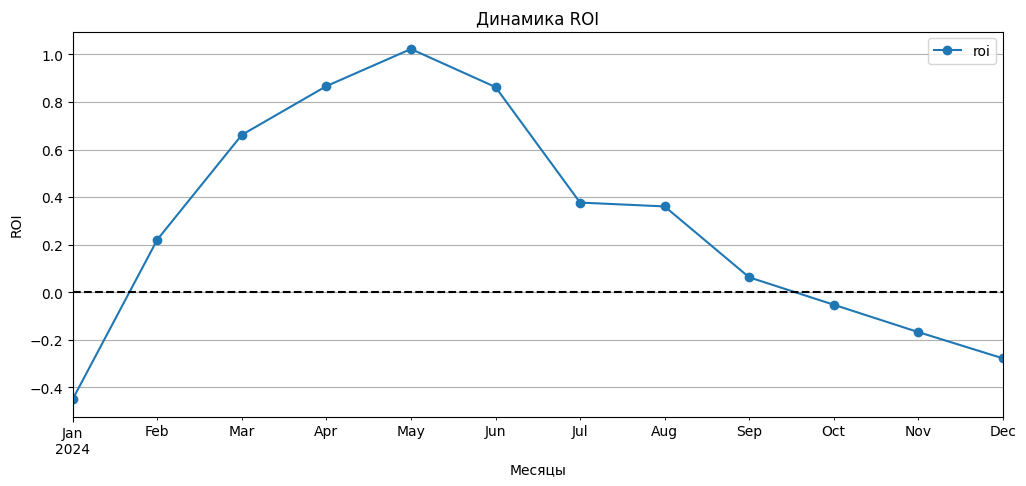

In [35]:
cac['roi'] = ((cac['ltv'] - cac['cac']) / cac['cac'])

cac.plot(kind= 'line',
                  x= 'cohort_month',
                  y= 'roi',
                  marker= 'o',
                  figsize=(12, 5))
plt.axhline(y= 0, color= 'black', linestyle= '--', label= 'Граница окупаемости')

plt.title('Динамика ROI')
plt.xlabel('Месяцы')
plt.ylabel('ROI')

plt.grid()
plt.show()

- Рост ROI в начале года: В январе ROI находится на низком уровне, но затем начинает быстро расти, достигая пика в мае. Это может указывать на успешные маркетинговые кампании или сезонные факторы, которые способствуют увеличению прибыли.
- Падение ROI после мая: После достижения пика в мае, ROI начинает снижаться, что может быть связано с завершением маркетинговых акций, снижением активности клиентов или другими факторами.

График демонстрирует динамику ROI в течение года, показывая рост и падение этого показателя. С сентября ROI ниже границы окупаемости.

In [36]:
pa_marketplace_users['registration_date'] = pd.to_datetime(pa_marketplace_users['registration_date']).dt.normalize()
pa_marketplace_orders['order_date'] = pd.to_datetime(pa_marketplace_orders['order_date']).dt.normalize()

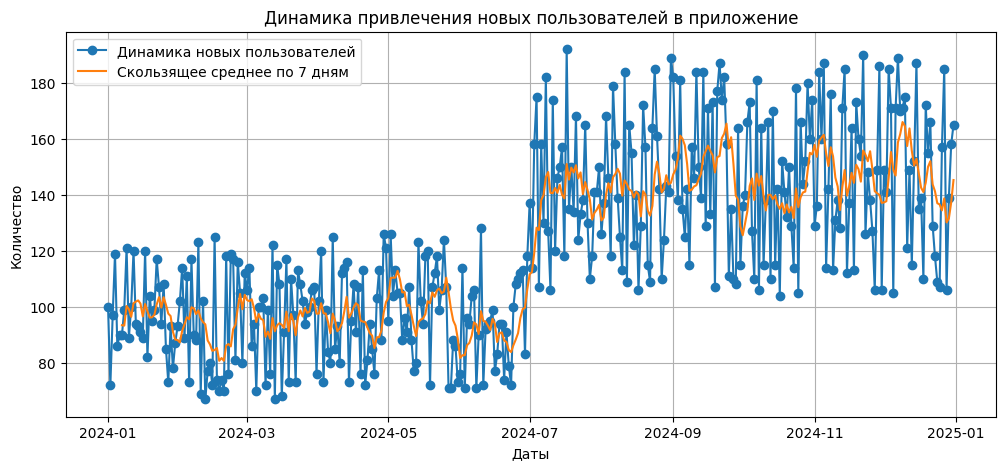

In [37]:
users_first = pa_marketplace_users.groupby('registration_date')['user_id'].nunique().reset_index()
users_first['7'] = users_first['user_id'].rolling(window=7).mean() 

plt.figure(figsize=(12, 5))

plt.plot(users_first['registration_date'], users_first['user_id'], marker= 'o')
plt.plot(users_first['registration_date'], users_first['7'])

plt.title('Динамика привлечения новых пользователей в приложение')
plt.ylabel('Количество')
plt.xlabel('Даты')

plt.legend(['Динамика новых пользователей', 'Скользящее среднее по 7 дням '])
plt.grid()
plt.show()

График показывает, что привлечение новых пользователей и их активность в приложении имеют сезонные колебания. В определенные месяцы (например, март, июль и ноябрь 2024 года) наблюдается рост как количества новых пользователей, так и их активности. Это может быть связано с маркетинговыми кампаниями, сезонными факторами или улучшением качества приложения.



## Выводы по этапам 2 и 3


Представьте ключевые выводы в текстовом виде здесь или приложите ссылку на документ с презентацией.

Не забудьте предоставить доступ на просмотр и комментирование документа.

Основные тенденции:
- Рост ключевых показателей: Все показатели демонстрируют пик в мае, включая ROI, LTV, CAC, AOV, Stickiness, DAU, WAU, MAU, ARPU и доходы. Вероятно, это связано с эффективностью проведенных мероприятий и активизацией клиентской базы.
- Последующее снижение: После майского пика наблюдается спад большинства метрик, что свидетельствует о завершении рекламных кампаний и снижении активности пользователей.
- Резкий спад в конце года: Практически все метрики показывают значительное снижение в октябре-декабре, возможно, вследствие завершения крупных проектов или изменений в стратегии маркетинга.

Ключевые моменты:
- Показатели эффективности (ROI, LTV) достигли максимальных значений в мае, однако после этого начали постепенно снижаться.
- Стоимость привлечения клиента (CAC) резко выросла в феврале-марте, достигнув пика в мае, что может свидетельствовать о значительных вложениях в привлечение новых пользователей.
- Средняя стоимость заказа (AOV) также достигла своего пика в мае, подчеркивая эффективность маркетинговых усилий в этот период.
- Уровень вовлеченности пользователей (Stickiness) вырос в марте-апреле, достигнув максимального значения в мае, что подтверждает увеличение активности аудитории.
- Число активных пользователей (DAU, WAU, MAU) демонстрировало аналогичную тенденцию роста до мая, после чего началось постепенное снижение.
- Средний доход на пользователя (ARPU) достиг наивысшего значения в мае, но снизился к концу года, отражая общую картину снижения активности.
- Общие доходы показали аналогичный тренд, достигнув наибольшего объема в мае и значительно уменьшившись к декабрю.

Выводы:
- Необходимо углубленное изучение факторов, повлиявших на пик активности в мае, для дальнейшего повышения эффективности маркетинговых кампаний.
- Следует обратить внимание на причины резкого падения всех показателей в конце года и разработать стратегию удержания пользователей и увеличения дохода.
- Важно оптимизировать расходы на привлечение клиентов, учитывая выявленные сезонные закономерности.

## 4. Поиск инсайтов, точек роста и сегментация


После того как вы провели верхнеуровневую оценку данных, самое время переходить от общей картины к точечным наблюдениям. Посмотрите вглубь данных: по каналам,
сегментам пользователей, категориям товаров, регионам, типам устройств. Ищите
закономерности, различия, аномалии.

Цель — сформировать обоснованные гипотезы:

* какие сегменты работают лучше остальных
* какие сегменты работают хуже остальных
* на каких этапах воронки теряются пользователи
* какие группы можно или нужно масштабировать
* куда стоит инвестировать больше внимания или ресурсов

По итогам анализа также:

* сформулируйте в виде аналитической записки выводы
* сформулируйте несколько гипотез, которые помогут развить продукт. Например: «Если предлагать клиентам на iOS персонализированные скидки, то они станут чаще конвертировать в продукт». При формулировании гипотез опишите, на что вы опираетесь при её формировании. Например, на динамику метрики или на взаимосвязь метрик.

Напишите выводы в конце блока, чтобы заказчик мог быстро ознакомиться с основными результатами.
Отправьте работу на проверку ревьюеру. Ревьюер будет проверять корректность выводов и гипотез, а не сам код расчета, поэтому проверьте, что у вас есть выводы по каждому из блоков в предназначенном для этого месте.
После завершения ревью вы получите от ревьюера новые вводные и задачу от бизнеса.


In [38]:
events_users = pa_marketplace_events.merge(pa_marketplace_users, on= 'user_id', how= 'left')

In [39]:
steps = ['page_view', 'product_click', 'product_view', 'add_to_cart', 'checkout_start', 'checkout_complete']

df_event = events_users[events_users['event_type'].isin(steps)].copy()
df_counts = df_event.groupby('event_type')['user_id'].nunique().reindex(steps)

full_df = pd.DataFrame({
   'step': df_counts.index,
   'users': df_counts.values
})

full_df['conversion_first_%'] = round((full_df['users'] / full_df['users'][0]) * 100, 1)
full_df['conversion_previous_%'] = round((full_df['users'] / full_df['users'].shift(1)) * 100, 1)

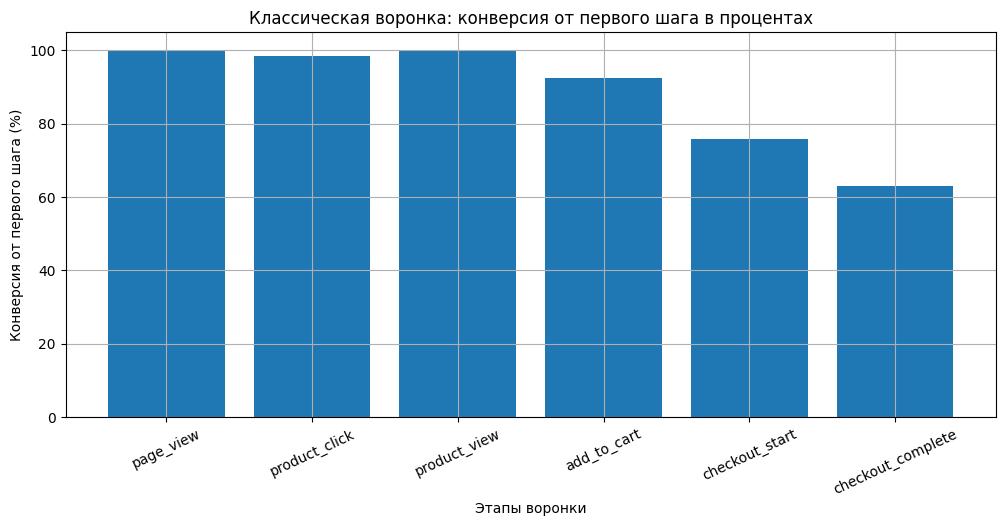

In [40]:
plt.figure(figsize=(12, 5))

plt.bar(full_df['step'], full_df['conversion_first_%'])

plt.title('Классическая воронка: конверсия от первого шага в процентах')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')

plt.xticks(rotation= 25)

plt.grid()
plt.show()

- page_view — 100% конверсия, что означает, что все пользователи, которые начали процесс, достигли этого этапа.
- product_click — около 95% конверсия, что показывает, что большинство пользователей переходят к следующему этапу после просмотра страницы.
- product_view  — около 90% конверсия, что указывает на то, что большинство пользователей, которые кликнули по продукту, продолжают его просматривать.
- add_to_cart — около 85% конверсия, что демонстрирует, что большинство пользователей, просмотревших продукт, добавляют его в корзину.
- checkout_start — около 75% конверсия, что показывает, что большинство пользователей, добавивших товар в корзину, начинают процесс оформления заказа.
- checkout_complete — около 65% конверсия, что указывает на то, что большинство пользователей, начавших оформление заказа, завершают его.

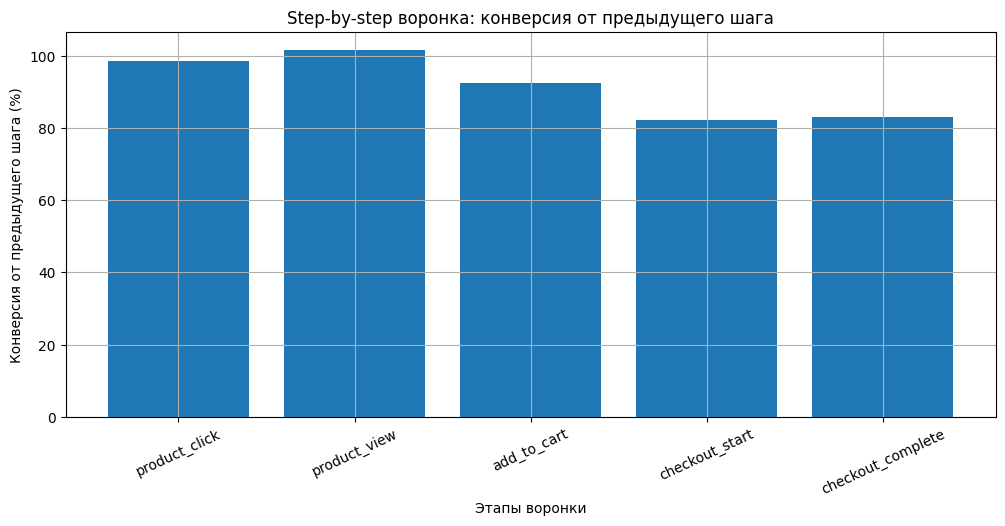

In [41]:
plt.figure(figsize=(12, 5))

plt.bar(full_df['step'][1:], full_df['conversion_previous_%'][1:])

plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')

plt.xticks(rotation= 25)

plt.grid()
plt.show()

- product_click — около 95% конверсия, что означает, что большинство пользователей, которые начали процесс, достигли этого этапа.
- product_view — около 90% конверсия, что показывает, что большинство пользователей, которые кликнули по продукту, продолжают его просматривать.
- add_to_cart — около 85% конверсия, что демонстрирует, что большинство пользователей, просмотревших продукт, добавляют его в корзину.
- checkout_start — около 75% конверсия, что показывает, что большинство пользователей, добавивших товар в корзину, начинают процесс оформления заказа.
- checkout_complete — около 65% конверсия, что указывает на то, что большинство пользователей, начавших оформление заказа, завершают его.

In [42]:
full_df_device = pd.DataFrame()

for i in events_users['device'].unique():
  df_device = events_users[events_users['device'] == i]

  df_group_device = df_device.groupby('event_type')['user_id'].nunique().reindex(steps)

  df_device = pd.DataFrame({
    'step': df_group_device.index,
    'users': df_group_device.values
  })

  df_device['conversion_first_%'] = round((df_device['users'] / df_device['users'][0]) * 100, 1)
  df_device['conversion_previous_%'] = round((df_device['users'] / df_device['users'].shift(1)) * 100, 1)
  df_device['device'] = i

  full_df_device = pd.concat([full_df_device, df_device])

device_previous_pivot = full_df_device.pivot(index='step', columns='device', values='conversion_previous_%').reindex(steps)
device_first_pivot = full_df_device.pivot(index='step', columns='device', values='conversion_first_%').reindex(steps)

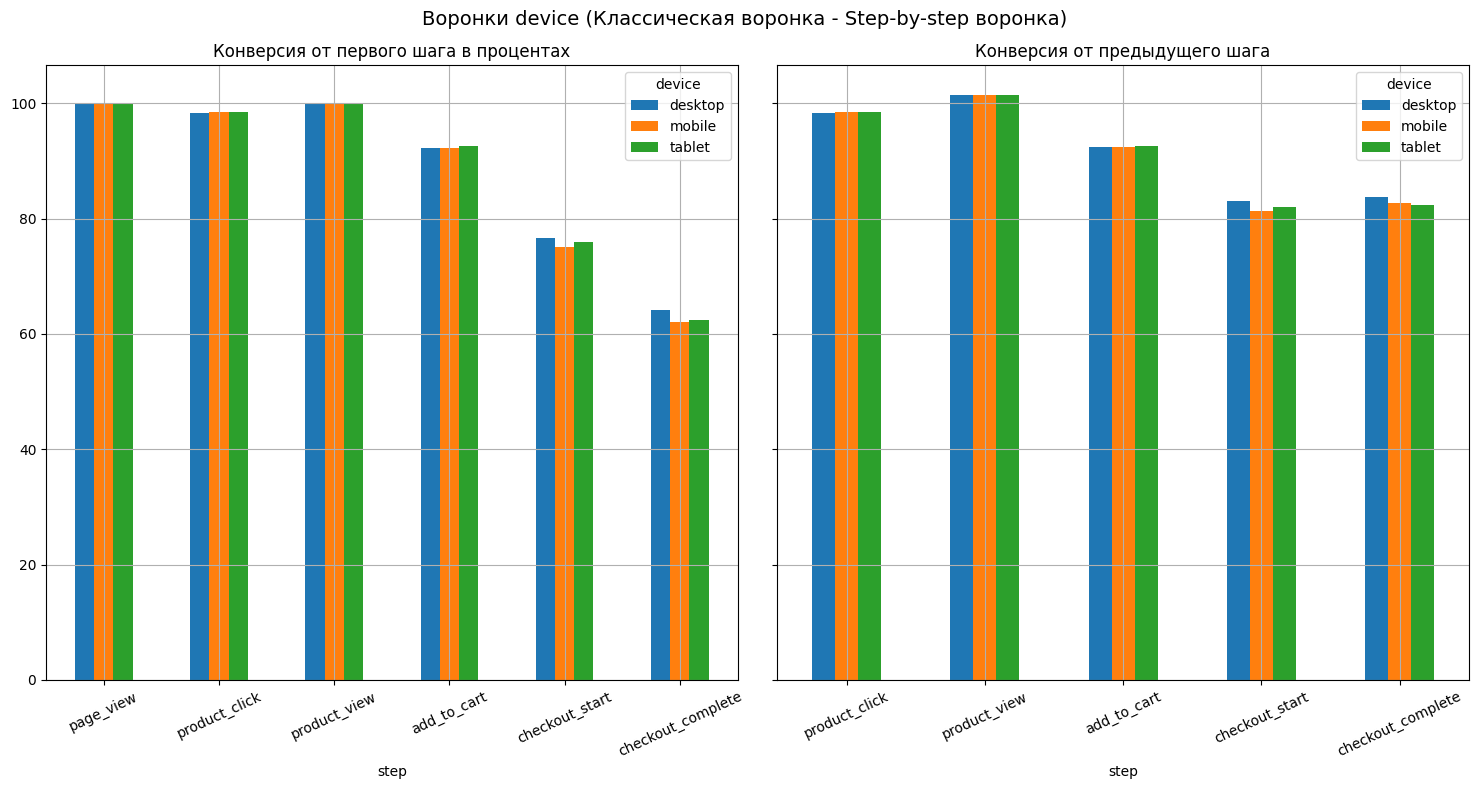

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Воронки device (Классическая воронка - Step-by-step воронка)', fontsize=14)

device_first_pivot.plot(kind='bar', ax=axes[0], title="Конверсия от первого шага в процентах", grid= True, rot= 25)

device_previous_pivot[1:].plot(kind='bar', ax=axes[1], title="Конверсия от предыдущего шага", grid= True, rot= 25)

plt.tight_layout()
plt.show()

На изображении представлены два графика, визуализирующие данные о конверсии пользователей на различных этапах взаимодействия.

Первый график, расположенный слева, называется "Конверсия от первого шага в процентах". Он показывает процент пользователей, которые переходят от одного этапа взаимодействия к следующему.  Этапы: "page_view", "product_click", "product_view", "add_to_cart", "checkout_start", "checkout_complete". Больше 60% пользователей, дошли до последнего этапа. 

Второй график, расположенный справа, называется "Конверсия от предыдущего шага". Он также показывает процент пользователей, которые переходят от одного этапа к следующему, но в данном случае процент рассчитывается относительно предыдущего шага. Начиная с шага "add_to_cart" и дальше, "checkout_start", "checkout_complete", заметны просадки между шагами, от 5% до 10%.

In [44]:
full_df_os = pd.DataFrame()

for i in events_users['os'].unique():
  df_os = events_users[events_users['os'] == i]

  df_group_os = df_os.groupby('event_type')['user_id'].nunique().reindex(steps)

  df_os = pd.DataFrame({
    'step': df_group_os.index,
    'users': df_group_os.values
  })

  df_os['conversion_first_%'] = round((df_os['users'] / df_os['users'][0]) * 100, 1)
  df_os['conversion_previous_%'] = round((df_os['users'] / df_os['users'].shift(1)) * 100, 1)
  df_os['os'] = i

  full_df_os = pd.concat([full_df_os, df_os])

os_first_pivot = full_df_os.pivot(index='step', columns='os', values='conversion_first_%').reindex(steps)
os_previous_pivot = full_df_os.pivot(index='step', columns='os', values='conversion_previous_%').reindex(steps)


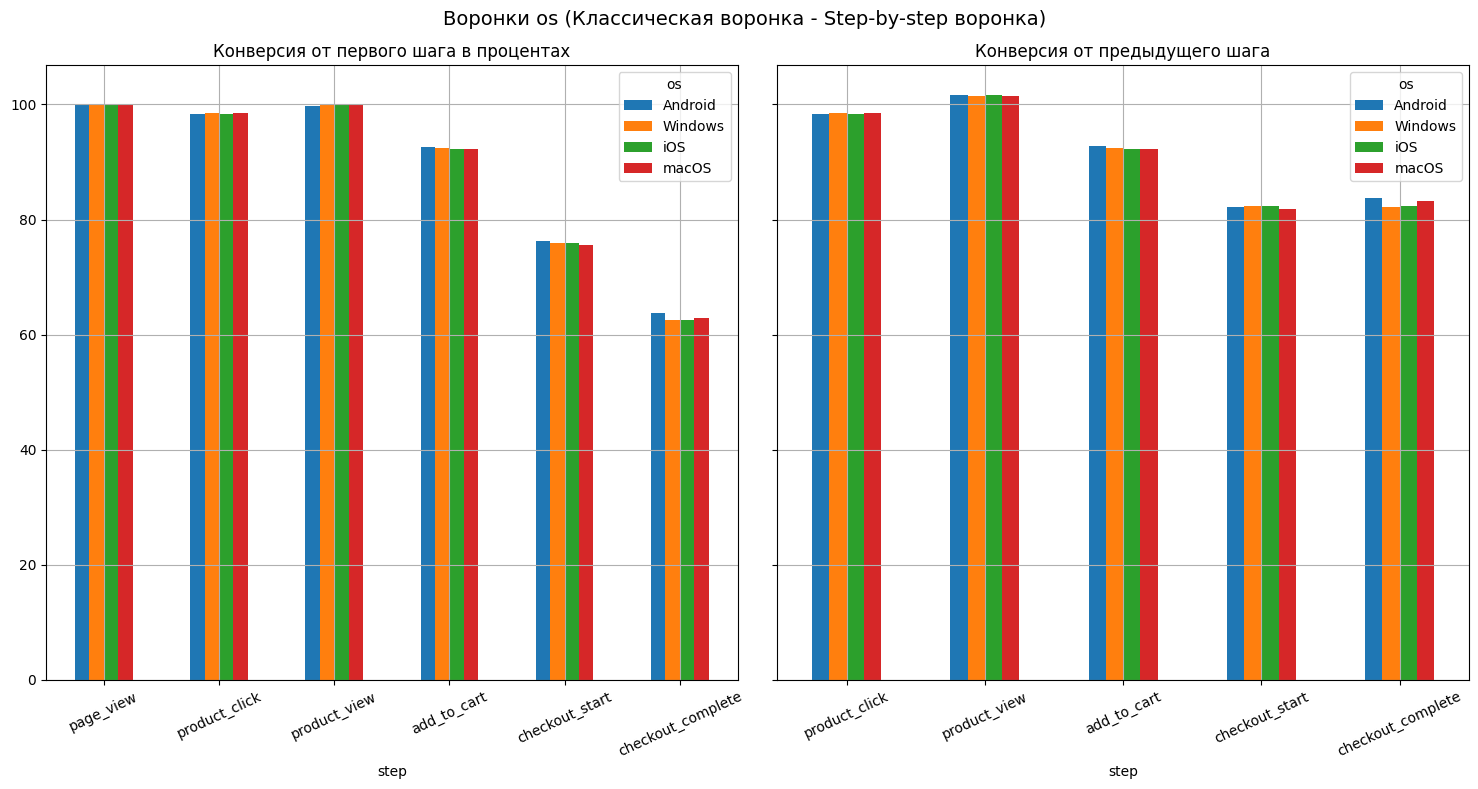

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Воронки os (Классическая воронка - Step-by-step воронка)', fontsize=14)

os_first_pivot.plot(kind='bar', ax=axes[0], title="Конверсия от первого шага в процентах", grid= True, rot= 25)

os_previous_pivot[1:].plot(kind='bar', ax=axes[1], title="Конверсия от предыдущего шага", grid= True, rot= 25)

plt.tight_layout()
plt.show()

На изображении представлены два графика, визуализирующие данные о конверсии пользователей на различных этапах взаимодействия. Данные графики в точности похожи на график "Воронки device (Классическая воронка - Step-by-step воронка)"

In [46]:
full_df_gender = pd.DataFrame()

for i in events_users['gender'].unique():
  df_gender = events_users[events_users['gender'] == i]

  df_group_gender = df_gender.groupby('event_type')['user_id'].nunique().reindex(steps)

  df_gender = pd.DataFrame({
    'step': df_group_gender.index,
    'users': df_group_gender.values
  })

  df_gender['conversion_first_%'] = round((df_gender['users'] / df_gender['users'][0]) * 100, 1)
  df_gender['conversion_previous_%'] = round((df_gender['users'] / df_gender['users'].shift(1)) * 100, 1)
  df_gender['gender'] = i

  full_df_gender = pd.concat([full_df_gender, df_gender])

gender_first_pivot = full_df_gender.pivot(index='step', columns='gender', values='conversion_first_%').reindex(steps)
gender_previous_pivot = full_df_gender.pivot(index='step', columns='gender', values='conversion_previous_%').reindex(steps)


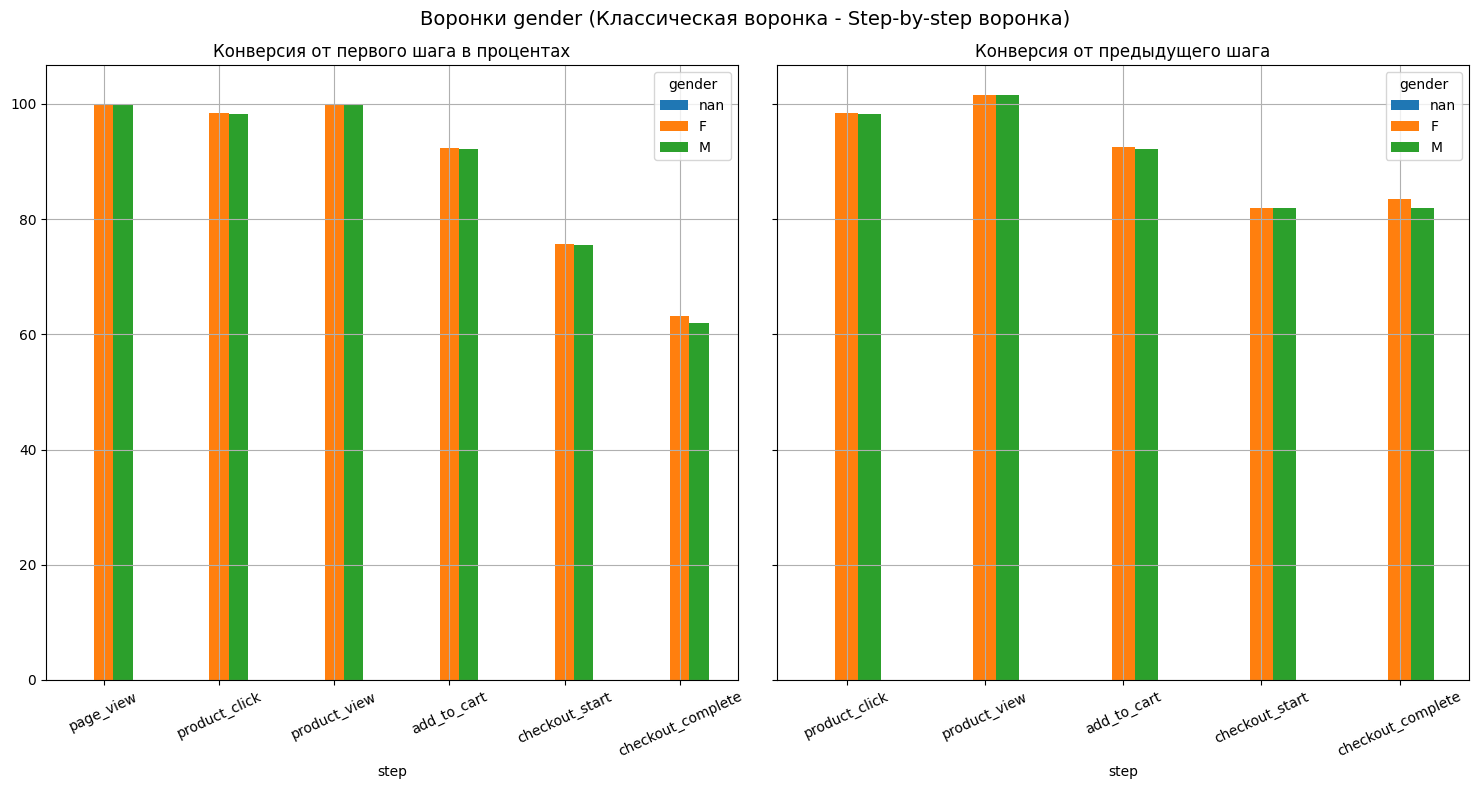

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Воронки gender (Классическая воронка - Step-by-step воронка)', fontsize=14)

gender_first_pivot.plot(kind='bar', ax=axes[0], title="Конверсия от первого шага в процентах", grid= True, rot= 25)

gender_previous_pivot[1:].plot(kind='bar', ax=axes[1], title="Конверсия от предыдущего шага", grid= True, rot= 25)

plt.tight_layout()
plt.show()

In [48]:
full_df_region = pd.DataFrame()

for i in events_users['region'].unique():
  df_region = events_users[events_users['region'] == i]

  df_group_region = df_region.groupby('event_type')['user_id'].nunique().reindex(steps)

  df_region = pd.DataFrame({
    'step': df_group_region.index,
    'users': df_group_region.values
  })

  df_region['conversion_first_%'] = round((df_region['users'] / df_region['users'][0]) * 100, 1)
  df_region['conversion_previous_%'] = round((df_region['users'] / df_region['users'].shift(1)) * 100, 1)
  df_region['region'] = i

  full_df_region = pd.concat([full_df_region, df_region])

region_first_pivot = full_df_region.pivot(index='step', columns='region', values='conversion_first_%').reindex(steps)
region_previous_pivot = full_df_region.pivot(index='step', columns='region', values='conversion_previous_%').reindex(steps)

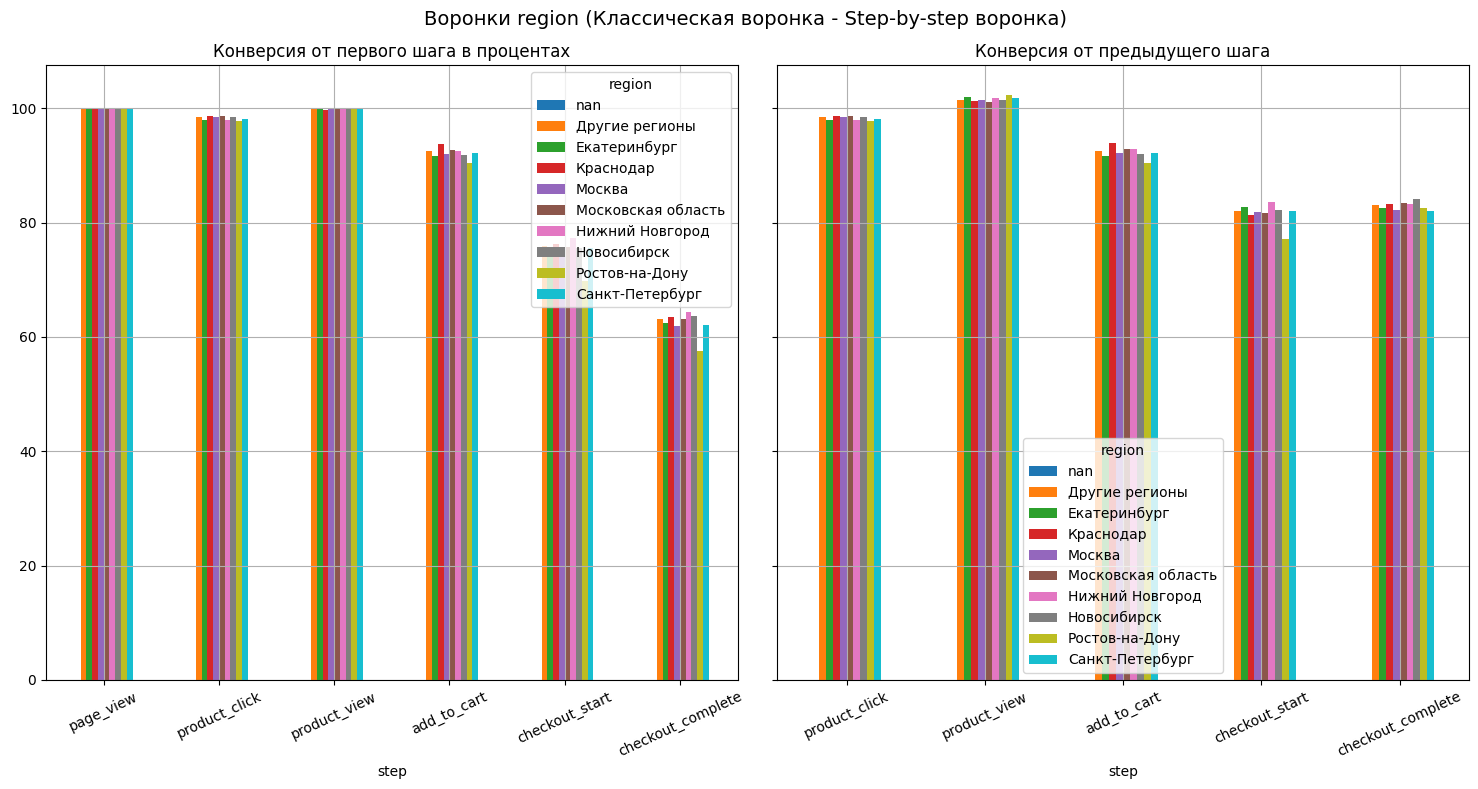

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Воронки region (Классическая воронка - Step-by-step воронка)', fontsize=14)

region_first_pivot.plot(kind='bar', ax=axes[0], title="Конверсия от первого шага в процентах", grid= True, rot= 25)

region_previous_pivot[1:].plot(kind='bar', ax=axes[1], title="Конверсия от предыдущего шага", grid= True, rot= 25)

plt.tight_layout()
plt.show()

На изображении представлены два графика, визуализирующие данные о конверсии пользователей на различных этапах взаимодействия. Хоть данный график и похож на графики воронки device, os, gender. Здесь замечена просадка по городу Ростов-на-Дону, данный город больше всех теряет между шагами, меньше 60% доходит до конца.

In [50]:
full_df_buyer_segment = pd.DataFrame()

for i in events_users['buyer_segment'].unique():
  df_buyer_segment = events_users[events_users['buyer_segment'] == i]

  df_group_buyer_segment = df_buyer_segment.groupby('event_type')['user_id'].nunique().reindex(steps)

  df_buyer_segment = pd.DataFrame({
    'step': df_group_buyer_segment.index,
    'users': df_group_buyer_segment.values
  })

  df_buyer_segment['conversion_first_%'] = round((df_buyer_segment['users'] / df_buyer_segment['users'][0]) * 100, 1)
  df_buyer_segment['conversion_previous_%'] = round((df_buyer_segment['users'] / df_buyer_segment['users'].shift(1)) * 100, 1)
  df_buyer_segment['buyer_segment'] = i

  full_df_buyer_segment = pd.concat([full_df_buyer_segment, df_buyer_segment])

buyer_segment_first_pivot = full_df_buyer_segment.pivot(index='step', columns='buyer_segment', values='conversion_first_%').reindex(steps)
buyer_segment_previous_pivot = full_df_buyer_segment.pivot(index='step', columns='buyer_segment', values='conversion_previous_%').reindex(steps)

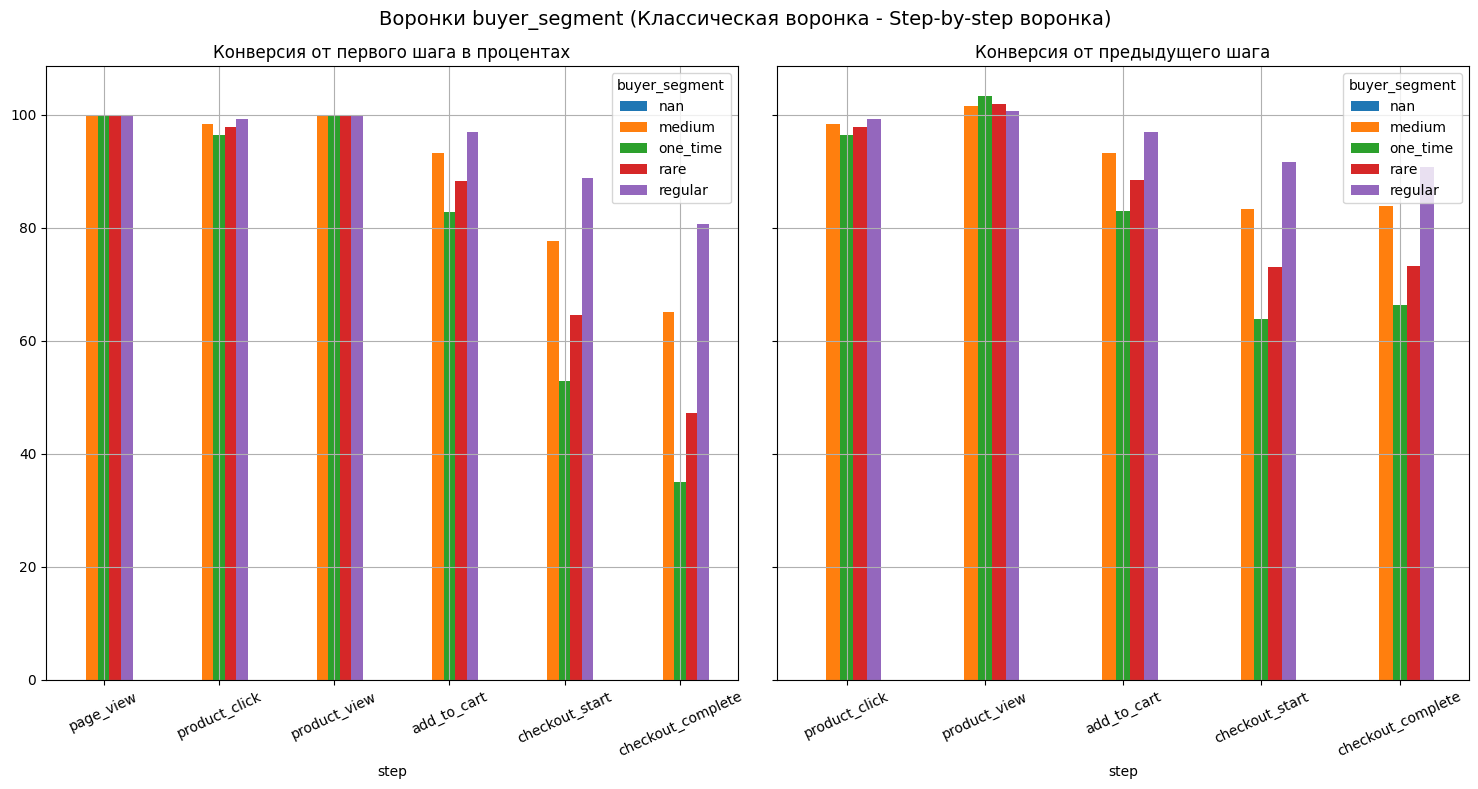

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Воронки buyer_segment (Классическая воронка - Step-by-step воронка)', fontsize=14)

buyer_segment_first_pivot.plot(kind='bar', ax=axes[0], title="Конверсия от первого шага в процентах", grid= True, rot= 25)

buyer_segment_previous_pivot[1:].plot(kind='bar', ax=axes[1], title="Конверсия от предыдущего шага", grid= True, rot= 25)

plt.tight_layout()
plt.show()

- Сегмент regular показывает наилучшую конверсию на всех этапах, что указывает на его высокую лояльность и готовность к покупке.
- Сегмент rare демонстрирует стабильное снижение конверсии на каждом этапе, особенно заметное на этапе checkout_complete.
- Сегмент one_time имеет наименьшую конверсию, что может быть связано с низкой активностью или низкой заинтересованностью.

Рекомендации:
- Уделить внимание сегменту rare и one_time, так как он теряет значительное количество клиентов на этапе checkout_complete. Возможно, стоит улучшить процесс оформления заказа.
- Для сегмента rare можно разработать специальные акции или программы лояльности, чтобы повысить их активность.
- Сегмент regular уже показывает высокие результаты, но можно продолжить работу над улучшением их опыта для поддержания лояльности.

In [52]:
full_df_acq_channel = pd.DataFrame()

for i in events_users['acq_channel'].unique():
  df_acq_channel = events_users[events_users['acq_channel'] == i]

  df_group_acq_channel = df_acq_channel.groupby('event_type')['user_id'].nunique().reindex(steps)

  df_acq_channel = pd.DataFrame({
    'step': df_group_acq_channel.index,
    'users': df_group_acq_channel.values
  })

  df_acq_channel['conversion_first_%'] = round((df_acq_channel['users'] / df_acq_channel['users'][0]) * 100, 1)
  df_acq_channel['conversion_previous_%'] = round((df_acq_channel['users'] / df_acq_channel['users'].shift(1)) * 100, 1)
  df_acq_channel['acq_channel'] = i

  full_df_acq_channel = pd.concat([full_df_acq_channel, df_acq_channel])

acq_channel_first_pivot = full_df_acq_channel.pivot(index='step', columns='acq_channel', values='conversion_first_%').reindex(steps)
acq_channel_previous_pivot = full_df_acq_channel.pivot(index='step', columns='acq_channel', values='conversion_previous_%').reindex(steps)

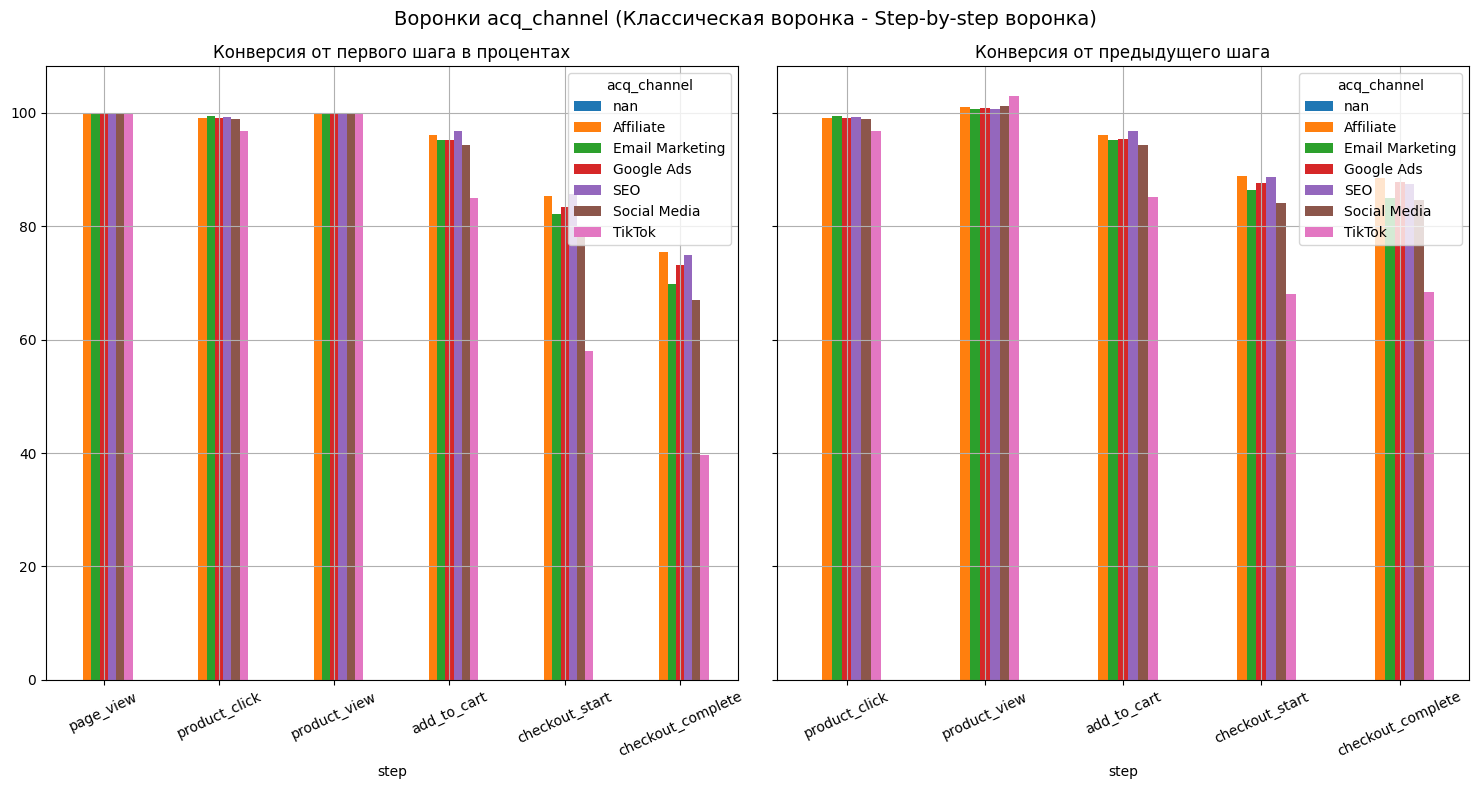

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Воронки acq_channel (Классическая воронка - Step-by-step воронка)', fontsize=14)

acq_channel_first_pivot.plot(kind='bar', ax=axes[0], title="Конверсия от первого шага в процентах", grid= True, rot= 25)

acq_channel_previous_pivot[1:].plot(kind='bar', ax=axes[1], title="Конверсия от предыдущего шага", grid= True, rot= 25)

plt.tight_layout()
plt.show()

Для анализа воронки acq_channel (классическая воронка - step-by-step воронка). Вот как можно интерпретировать данные и что они показывают:
- На этапе page_view все каналы показывают 100% конверсию, так как это начальный этап.
- На этапе checkout_complete видно, что каналы SEO и Affiliate имеют более высокую конверсию по сравнению с другими каналами, такими как Email Marketing или TikTok. TikTok же падает ниже 40%.

Конверсия от предыдущего шага
- На этапе product_click видно, что канал Affiliate имеют высокую конверсию, что может указывать на их эффективность в привлечении внимания пользователей.
- На этапе checkout_start каналы SEO и Social Media показывают снижение конверсии, что может быть связано с проблемами на этом этапе. TikTok, всё также сильно проседает.

Рекомендации по оптимизации
- Если на этапе add_to_cart наблюдается снижение конверсии, стоит проверить удобство добавления товаров в корзину.
- На этапе checkout_start можно оптимизировать процесс оформления заказа, чтобы уменьшить отток пользователей.

Фокус на эффективных каналах:
- Каналы SEO и Affiliate показывают высокую конверсию. Рекомендуется увеличить инвестиции в эти каналы.

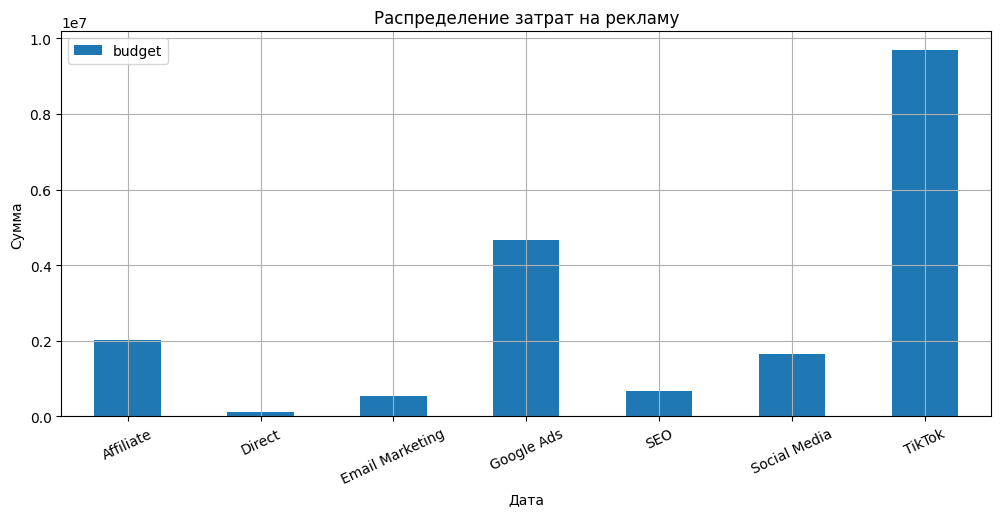

In [54]:
acq_channel_total = pa_marketplace_campaign_costs.groupby('acq_channel')['budget'].sum().reset_index()

acq_channel_total.plot(kind='bar', x= 'acq_channel', figsize=(12, 5), rot= 25)

plt.title('Распределение затрат на рекламу')
plt.xlabel('Дата')  
plt.ylabel('Сумма')   

plt.grid()
plt.show()

На графике показано распределение рекламного бюджета по различным каналам. TikTok выделяется как канал с наибольшими затратами (около 1,0), за ним следуют Google Ads (примерно 0,5) и Social Media (около 0,2). Остальные каналы, такие как Affiliate, Direct, Email Marketing и SEO, имеют значительно меньшие затраты.

Рекомендации по оптимизации:
- Фокус на конверсионные каналы. Google Ads и TikTok могут быть конверсионными каналами, так как они привлекают значительное внимание. Как мы уже знаем, конверсия TikTok, очень маленькая, а затраты самые большие.
- Оптимизация вспомогательных каналов. Email Marketing и SEO могут быть вспомогательными каналами. Убедитесь, что они поддерживают основные каналы и повышают вовлеченность аудитории.
- Эксперименты с новыми каналами. Рассмотрите возможность тестирования каналов с меньшими затратами, таких как Direct или Affiliate, чтобы найти новые источники трафика.
- Сезонное планирование. Учитывайте цикличность бизнеса. Например, в высокий сезон увеличьте бюджет на быстрые каналы (Google Ads), а в низкий — на долгосрочные (SEO).


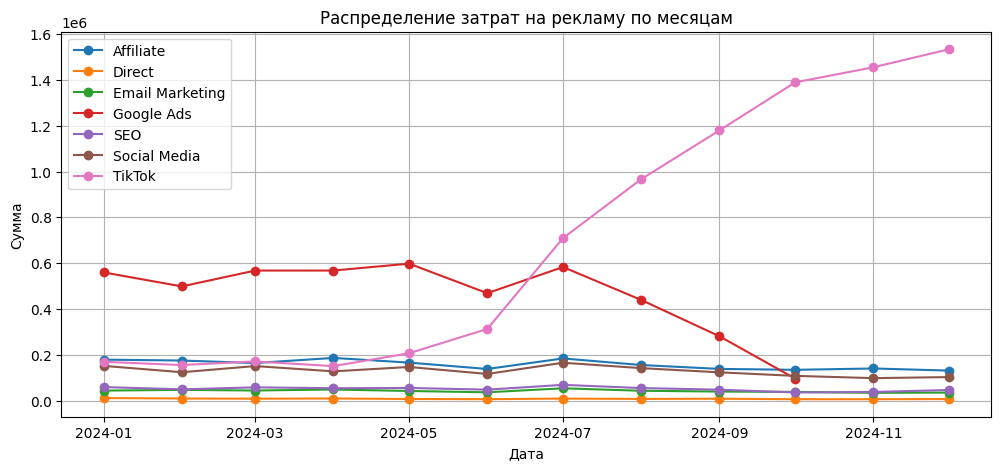

In [55]:
acq_channel_total_month = pa_marketplace_campaign_costs.groupby(['spend_month', 'acq_channel'])['budget'].sum().reset_index()

plt.subplots(figsize=(12,5))

for i in acq_channel_total_month['acq_channel'].unique():
  filter_acq_channel = acq_channel_total_month[(acq_channel_total_month['acq_channel'] == i) & (acq_channel_total_month['spend_month'] < '2025-01-01')]
  plt.plot(filter_acq_channel[filter_acq_channel['acq_channel'] == i]['spend_month'], filter_acq_channel[filter_acq_channel['acq_channel'] == i]['budget'], marker= 'o', label= i)

plt.title('Распределение затрат на рекламу по месяцам')
plt.xlabel('Дата')  
plt.ylabel('Сумма')   

plt.legend()
plt.grid()
plt.show()

График показывает распределение затрат на рекламу по месяцам для различных каналов. Вот основные выводы:
- Затраты на TikTok значительно выросли с 0,2 в начале года до 1,5 в ноябре. 
- Затраты на Direct остаются стабильными на уровне около 0,1 на протяжении всего периода.
- Затраты на Email Marketing также остаются низкими и стабильными, около 0,1.
- Затраты на Google Ads колеблются в диапазоне от 0,1 до 0,2, без явной тенденции к росту или снижению.
- Затраты на SEO остаются низкими и стабильными, около 0,1.
- Затраты на Social Media варьируются от 0,1 до 0,2, с небольшими колебаниями.
- Затраты на Affiliate остаются низкими и стабильными, около 0,1.

Учитывая значительный рост затрат на TikTok, стоит проанализировать его эффективность. Если канал приносит хорошие результаты, можно продолжить инвестировать в него. Как раз с ростом трат на TikTok, с мая начинает падать LTV и расти САС. Конверсия составляет 40%. Лучше перераспределить бюджет на SEO, Affiliate.

Оптимизация других каналов:
- Для каналов с низкими затратами (Direct, Email Marketing, SEO, Affiliate) стоит оценить их вклад в общий результат. Если они не приносят ожидаемой отдачи, можно перераспределить бюджет.



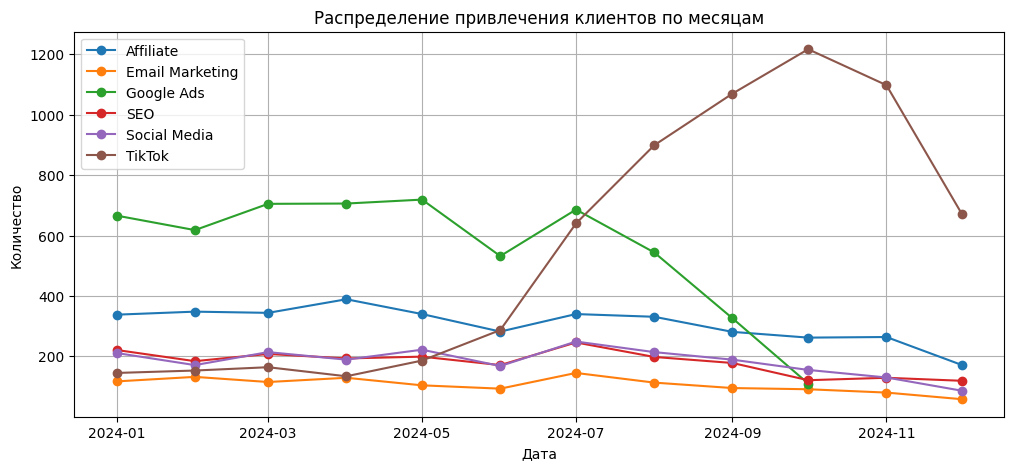

In [56]:
acq_channel_users = events_users.groupby(['cohort_month', 'acq_channel'])['user_id'].nunique().reset_index()

plt.subplots(figsize=(12,5))

for i in acq_channel_users['acq_channel'].unique():
  filter_acq_channel = acq_channel_users[acq_channel_users['acq_channel'] == i]
  plt.plot(filter_acq_channel[filter_acq_channel['acq_channel'] == i]['cohort_month'], filter_acq_channel[filter_acq_channel['acq_channel'] == i]['user_id'], marker= 'o', label= i)

plt.title('Распределение привлечения клиентов по месяцам')
plt.xlabel('Дата')  
plt.ylabel('Количество')   

plt.legend()
plt.grid()
plt.show()

На графике представлено распределение привлечения клиентов по месяцам с использованием различных каналов: Affiliate, Email Marketing, Google Ads, SEO, Social Media и TikTok. Вот основные выводы и рекомендации:

- TikTok демонстрирует значительный рост в начале года, достигая пика в марте, но затем наблюдается снижение активности.
- SEO показывает стабильный уровень привлечения клиентов на протяжении всего периода.
- Google Ads имеет колебания, но в целом остается на среднем уровне.
- Social Media и Email Marketing демонстрируют умеренные показатели с небольшими колебаниями.
- Affiliate показывает относительно низкий уровень привлечения клиентов.

Рекомендации:
- Фокус на SEO: Поскольку SEO стабильно привлекает клиентов, рекомендуется продолжать инвестировать в этот канал для долгосрочного роста.
- Анализ Google Ads: Исследуйте причины колебаний и оптимизируйте кампании для повышения эффективности.
- Развитие Social Media и Email Marketing: Эти каналы могут быть улучшены за счет более таргетированных кампаний и персонализированного контента.


## Выводы по этапу 4

Представьте ключевые выводы в текстовом виде здесь или приложите ссылку на документ с презентацией.

Не забудьте предоставить доступ на просмотр и комментирование документа.

Выявленные закономерности и аномалии
Каналы привлечения:
- TikTok демонстрирует высокий уровень затрат при низкой конверсии (менее 40%) и падении LTV с ростом САС, что говорит об ограниченных способностях удерживать интерес пользователей.
- SEO и Affiliate показывают стабильно высокую конверсию на всех этапах - это указывает на их способность привлекать качественных пользователей, с меньшими затратами.
- Email Marketing и Social Media имеют умеренные показатели эффективности
- Direct остается на стабильно низком уровне затрат

Сегментация пользователей:
- Сегмент regular и medium демонстрирует наилучшую конверсию на всех этапах
- Сегмент rare показывает стабильное снижение конверсии, особенно на этапе оформления заказа
- Сегмент one_time имеет самую низкую конверсию
- Ростов-на-Дону показывает значительное падение конверсии между этапами (менее 60% доходят до конца)

Ключевые этапы с проблемами:
- Снижение конверсии на этапе add_to_cart, что может свидетельствовать о сложностях интерфейса или недостаточном удобстве процесса покупки.
- Отток пользователей на этапе checkout_start указывает на возможные технические трудности или отсутствие мотивации завершить покупку.
- Просадки между этапами от 5% до 10% на поздних стадиях воронки, нужно оптимизировать процесс оформления заказа для снижения оттока.

Работа с регионами:
- Гипотеза: внедрение региональных особенностей интерфейса повысит конверсию в Ростове-на-Дону до среднего уровня
- Основание: низкая конверсия в данном регионе
Улучшение пользовательского опыта:
- Гипотеза: упрощение процесса оформления заказа увеличит конверсию
- Основание: просадки на этапах checkout_start и checkout_complete
Сегментация аудитории:
- Гипотеза: разработка специальных предложений для сегмента rare повысит их активность
- Основание: низкая конверсия данного сегмента
Распределение бюджета:
- Гипотеза: перераспределение бюджета с TikTok на SEO и Affiliate увеличит общую выручку
- Основание: высокая эффективность последних при низких затратах

Рекомендация: 
- Пересмотреть стратегию использования TikTok и провести оценку рентабельности инвестиций. При неудовлетворительных результатах сократить финансирование и направить средства на более выгодные каналы с высокой конверсией (SEO, Affiliate).
- Оптимизировать процесс оформления заказа. Предложить дополнительные стимулы для завершения транзакции, такие как скидки или бонусы.
- Разработать региональную стратегию для Ростова-на-Дону, для повышенная конверсии и удержания клиентов.
- Усилить работу с сегментом regular для повышения лояльности
Ожидаемые результаты:
- Повышение общей конверсии воронки и повышение удовлетворенности пользователей
- Оптимизация затрат на привлечение клиентов
- Снижение САС за счет перераспределения бюджета и улучшение показателей LTV

Анализ показал, что некоторые каналы, такие как SEO и Affiliate, обладают высоким уровнем конверсии и заслуживают повышенного внимания и инвестиций. Другие каналы, включая TikTok и Email Marketing, нуждаются в дополнительной оценке и возможной оптимизации. Особое внимание следует уделить устранению препятствий на критических этапах воронки продаж, таких как "add_to_cart" и "checkout_start", чтобы минимизировать потерю потенциальных клиентов.


## 5. Подготовка эксперимента и подведение его результатов

Получите вводную информацию для выполнения этого этапа у ревьюера после успешного завершения предыдущих шагов.

# Новые вводные (после этапа 4)
Команда продукта рассмотрела твои гипотезы и на основании этого решила влиять на конверсию при помощи финансовых стимуляций. Так как ситуация со снижением выручки срочная и безотлагательная, пока ты продолжал изучать данные, они подключили другого аналитика для подготовки дизайн документа, но само проведение эксперимента на тебе.


При формировании выводов допиши рекомендации по итогам теста и, если необходимо, опиши проблемы, присутствующие в эксперименте.


## Новые данные:
```python
pa_marketplace_events_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_events_AB.csv')
pa_marketplace_orders_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_orders_AB.csv')
pa_marketplace_users_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_users_AB.csv')
```
## Результаты сплита лежат в таблице:
```python
pa_marketplace_AB_split_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_marketplace_AB_split_users.csv')
```
* user_id – id клиента
* group – группа, в которую попал клиент


# Дизайн эксперимента: Бонус на первую покупку для пользователей TikTok
## 1. Контекст и цель эксперимента
- **Бизнес-контекст:** Команда продукта запускает эксперимент, направленный на повышение конверсии среди пользователей, привлечённых через канал TikTok. Для стимулирования первой покупки пользователям будет предоставлен бонус на первую покупку.
- **Цель:** Проверить, влияет ли предоставление бонуса на первую покупку на конверсию и выручку среди пользователей TikTok.
- **Гипотеза:** Предоставление бонуса на первую покупку новым пользователям, привлеченным через TikTok, приведет к увеличению конверсии в первую покупку
---
## 2. Формат эксперимента
- **Тип эксперимента:** Сплит-роллинг (rolling split)
- **Канал:** Только пользователи, пришедшие с TikTok
- **Группы:**
    - **Контрольная (A):** пользователи TikTok без бонуса
    - **Тестовая (B):** пользователи TikTok с бонусом на первую покупку
- **Распределение:** Равномерное распределение новых пользователей TikTok между группами по дате регистрации
- **Период проведения:** 3 недели (фиксировано)
---
## 3. Ключевые метрики
### Основная метрика
- **Конверсия в первую покупку** — доля пользователей, зарегистрировавшихся с TikTok и совершивших первую покупку
- *Цель:* увеличить конверсию с помощью бонуса
- *Критерий успеха:* статистически значимый рост конверсии в тестовой группе
### Вспомогательные метрики
- **ARPU** (средняя выручка на пользователя TikTok)
- **ARPPU** (средняя выручка на покупателя TikTok)
- **AOV** (средний чек TikTok)
### Барьерная метрика
- **Общая выручка от пользователей TikTok**
---
## 4. Размеры групп и запуск
- **Целевая аудитория:** только пользователи TikTok
- **Размеры групп:** определяются по фактическому трафику TikTok за период эксперимента
- **Комментарий:** запуск без предварительного расчёта мощности и MDE из-за срочности задачи


In [ ]:
pa_marketplace_events_AB = pd.read_csv('marketplace_events_AB.csv')
pa_marketplace_orders_AB = pd.read_csv('marketplace_orders_AB.csv')
pa_marketplace_users_AB = pd.read_csv('marketplace_users_AB.csv')

pa_marketplace_AB_split_users = pd.read_csv('marketplace_AB_split_users.csv')

Пользователи в эксперименте могли попасть сразу в несколько групп.

In [58]:
flawed_users = pa_marketplace_AB_split_users.groupby('user_id')['group'].nunique().reset_index()
# Фильтруем клиентов у которых больше 1 группы
flawed_users = flawed_users[flawed_users['group'] > 1]
# Убираем пользователей, попавших в несколько групп
split_data_correct = pa_marketplace_AB_split_users[~pa_marketplace_AB_split_users['user_id'].isin(flawed_users['user_id'])]

print(f'Данные очищены, было {pa_marketplace_AB_split_users.shape[0]} пользователей, осталось {split_data_correct.shape[0]}')

Данные очищены, было 2968 пользователей, осталось 2968


In [59]:
pa_marketplace_orders_AB['order_date'] = pa_marketplace_orders_AB['order_date'].str.replace('.000', '')

pa_marketplace_orders_AB['order_date'] = pd.to_datetime(pa_marketplace_orders_AB['order_date']).dt.normalize()
pa_marketplace_events_AB['event_date'] = pd.to_datetime(pa_marketplace_events_AB['event_date']).dt.normalize()
pa_marketplace_users_AB['registration_date'] = pd.to_datetime(pa_marketplace_users_AB['registration_date']).dt.normalize()

In [60]:
data_users = pa_marketplace_users_AB[pa_marketplace_users_AB['user_id'].isin(pa_marketplace_AB_split_users['user_id'])]
data_users = pd.merge(data_users, pa_marketplace_AB_split_users[['user_id', 'group']], on= 'user_id')

data_orders = pa_marketplace_orders_AB[pa_marketplace_orders_AB['user_id'].isin(pa_marketplace_AB_split_users['user_id'])]
data_orders = pd.merge(data_orders, pa_marketplace_AB_split_users[['user_id', 'group']], on= 'user_id')

data_events = pa_marketplace_events_AB[pa_marketplace_events_AB['user_id'].isin(pa_marketplace_AB_split_users['user_id'])]
data_events = pd.merge(data_events, pa_marketplace_AB_split_users[['user_id', 'group']], on= 'user_id')

In [61]:
# Пустой список для результатов
records = []
# Формируем лист дат для цикла и сортируем его
date_list = data_events['event_date'].dt.date.unique()
date_list.sort()

# Конверсия из зарегистрировавшихся с TikTok в checkout_complete
for current_date in date_list:
   # Заказы до текущей даты включительно
   orders_to_date = data_events[data_events['event_date'].dt.date <= current_date]
   completed_orders_to_date = orders_to_date[orders_to_date['event_type'] == 'checkout_complete']
   # Общее количество заказов в каждой группе, столбец с расчётом должен называться total_orders
   total_orders_by_group = orders_to_date.groupby('group')['user_id'].nunique().reset_index()
   total_orders_by_group = total_orders_by_group.rename(columns={'user_id': 'total_orders'})
    # Общее количество заказов
   completed_orders_by_group = completed_orders_to_date.groupby('group')['user_id'].nunique().reset_index()
   completed_orders_by_group = completed_orders_by_group.rename(columns={'user_id': 'completed_orders'})
   # Объединение и расчёт конверсии
   df_merged_orders = pd.merge(total_orders_by_group, completed_orders_by_group, how='outer', on='group')
   df_merged_orders['conversion'] = 100 * df_merged_orders['completed_orders'] / df_merged_orders['total_orders']

   df_merged_orders['date'] = current_date
   records.append(df_merged_orders)

# Собираем в итоговый датафрейм
conversion_df = pd.concat(records)

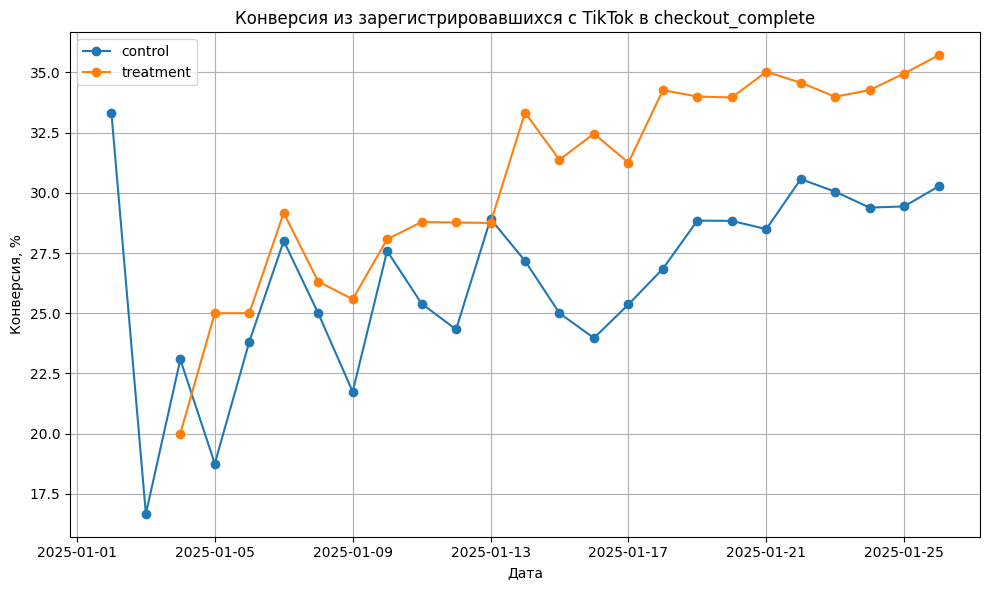

In [62]:
plt.figure(figsize=(10, 6))

for group in conversion_df['group'].unique():
   group_data = conversion_df[conversion_df['group'] == group]
   plt.plot(group_data['date'], group_data['conversion'], marker='o', label=group)

plt.title('Конверсия из зарегистрировавшихся с TikTok в checkout_complete')
plt.xlabel('Дата')
plt.ylabel('Конверсия, %')

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

График показывает конверсию из зарегистрировавшихся с TikTok в checkout_complete для двух групп: control (синяя линия) и treatment (оранжевая линия). Вот основные выводы:

- Начиная с 13 января кривая treatment уверенно растёт, и к концу периода показывает лучшие результаты среди всех групп. Это может говорить о нарастающем со временем эффекте.
- Конверсия в группе treatment демонстрировала более стабильную тенденцию, начиная с 20% и постепенно увеличиваясь до 35% к концу периода.

Сравнение групп:
- Группа treatment показала более высокий рост конверсии в течение всего периода.
- Разница между группами особенно заметна в середине периода, когда конверсия в treatment была выше на 5–10%.

Группа treatment демонстрирует более успешную стратегию привлечения пользователей из TikTok в checkout_complete.

In [63]:
data_orders['revenue'] = (data_orders['total_price'] * 0.05).astype('float')

In [64]:
total_revenue_AB = data_orders.groupby('order_date')['revenue'].sum().reset_index()
total_users_AB = data_events.groupby('event_date')['user_id'].nunique().reset_index().rename(columns= {'user_id': 'total_users'})
total_users_order_AB = data_orders.groupby('order_date')['user_id'].nunique().reset_index().rename(columns= {'user_id': 'total_users_order'})
total_quantity_AB = data_orders.groupby('order_date')['quantity'].sum().reset_index()

total_revenue_AB_group = data_orders.groupby(['order_date', 'group'])['revenue'].sum().reset_index()
total_users_AB_group = data_events.groupby(['event_date', 'group'])['user_id'].nunique().reset_index().rename(columns= {'user_id': 'total_users'})
total_users_order_AB_group = data_orders.groupby(['order_date', 'group'])['user_id'].nunique().reset_index().rename(columns= {'user_id': 'total_users_order'})
total_quantity_AB_group = data_orders.groupby(['order_date', 'group'])['quantity'].sum().reset_index()

In [65]:
ARPU_ARPPU_AOV_AB = pd.DataFrame()

ARPU_ARPPU_AOV_AB['date'] = total_revenue_AB['order_date']
ARPU_ARPPU_AOV_AB['ARPU'] = total_revenue_AB['revenue'] / total_users_AB['total_users']
ARPU_ARPPU_AOV_AB['ARPPU'] = total_revenue_AB['revenue'] / total_users_order_AB['total_users_order']
ARPU_ARPPU_AOV_AB['AOV'] = total_revenue_AB['revenue'] / total_quantity_AB['quantity']

ARPU_ARPPU_AOV_AB_group = pd.DataFrame()

ARPU_ARPPU_AOV_AB_group['date'] = total_revenue_AB_group['order_date']
ARPU_ARPPU_AOV_AB_group['group'] = total_revenue_AB_group['group']
ARPU_ARPPU_AOV_AB_group['ARPU'] = total_revenue_AB_group['revenue'] / total_users_AB_group['total_users']
ARPU_ARPPU_AOV_AB_group['ARPPU'] = total_revenue_AB_group['revenue'] / total_users_order_AB_group['total_users_order']
ARPU_ARPPU_AOV_AB_group['AOV'] = total_revenue_AB_group['revenue'] / total_quantity_AB_group['quantity']

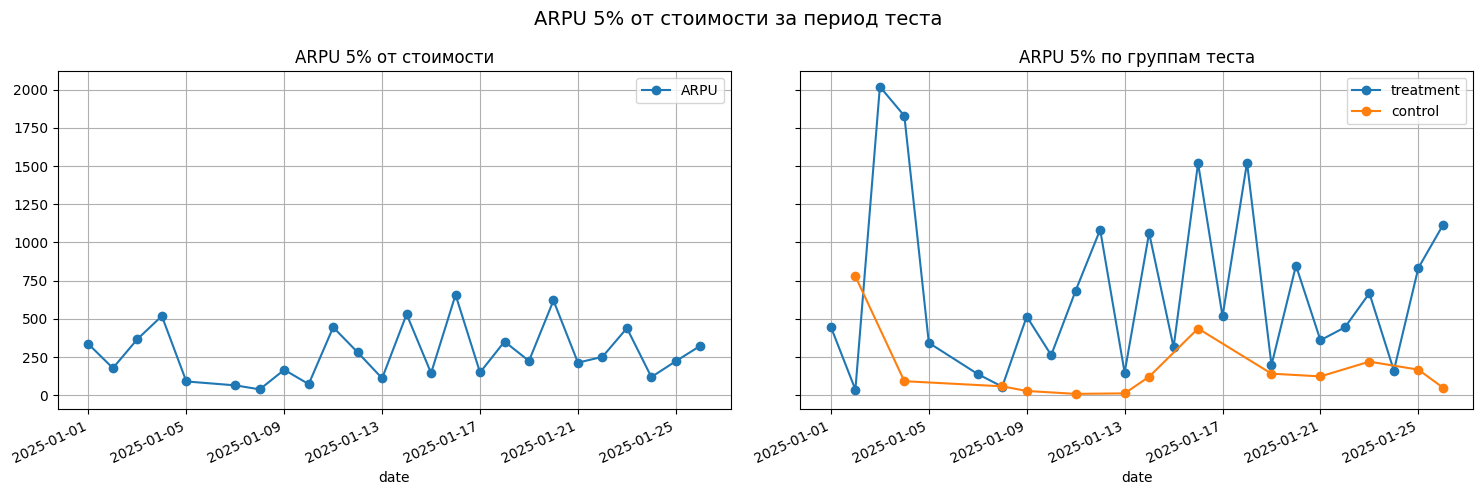

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('ARPU 5% от стоимости за период теста', fontsize=14)

ARPU_ARPPU_AOV_AB.plot(kind= 'line', x= 'date', y= 'ARPU', ax=axes[0], title="ARPU 5% от стоимости", grid= True, rot= 25, marker= 'o')

for i in ARPU_ARPPU_AOV_AB_group['group'].unique():
  df_AB = ARPU_ARPPU_AOV_AB_group[ARPU_ARPPU_AOV_AB_group['group'] == i]
  df_AB.plot(kind= 'line',  x= 'date', y= 'ARPU', ax=axes[1], title= "ARPU 5% по группам теста", grid= True, rot= 25, label= i, marker= 'o')

plt.tight_layout()
plt.show()

График «ARPU 5% от стоимости за период теста» показывает изменение среднего дохода на пользователя (ARPU) в процентах от стоимости за определённый период времени. На графике видно, что значения ARPU колеблются, что может указывать на изменения в поведении пользователей или эффективности продукта.

График «ARPU 5% по группам теста» сравнивает ARPU между двумя группами: контрольной (control) и экспериментальной (treatment). Это позволяет оценить, как изменения в продукте или маркетинге влияют на доход. Например, если значения в группе treatment выше, чем в контрольной, это может свидетельствовать о положительном эффекте изменений.

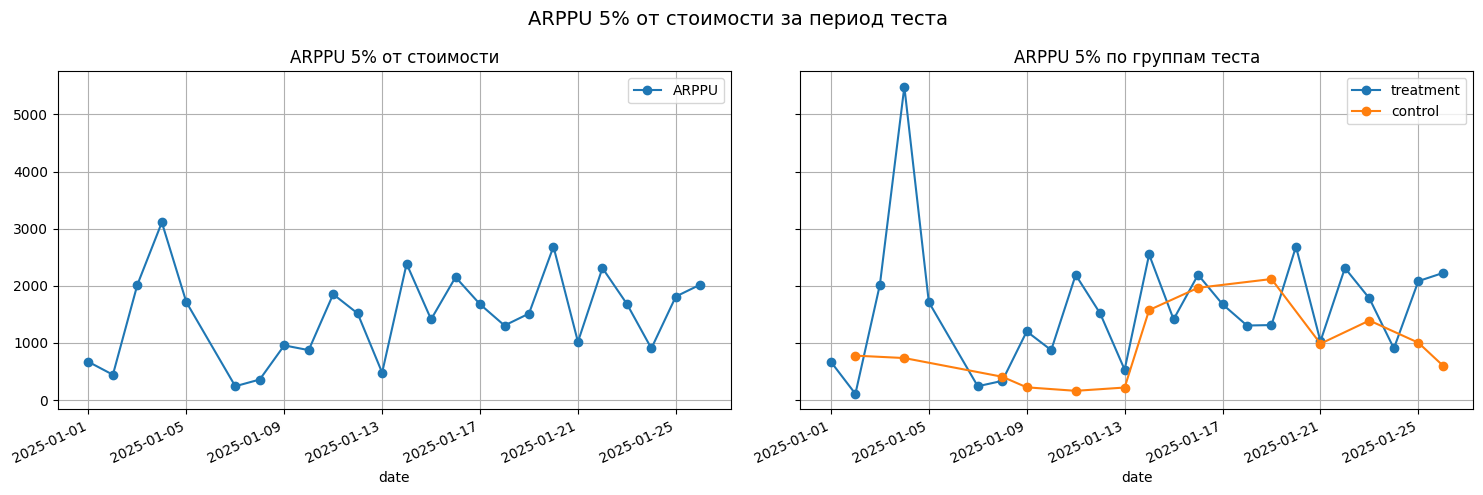

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('ARPPU 5% от стоимости за период теста', fontsize=14)

ARPU_ARPPU_AOV_AB.plot(kind= 'line', x= 'date', y= 'ARPPU', ax=axes[0], title="ARPPU 5% от стоимости", grid= True, rot= 25, marker= 'o')

for i in ARPU_ARPPU_AOV_AB_group['group'].unique():
  df_AB = ARPU_ARPPU_AOV_AB_group[ARPU_ARPPU_AOV_AB_group['group'] == i]
  df_AB.plot(kind= 'line',  x= 'date', y= 'ARPPU', ax=axes[1], title= "ARPPU 5% по группам теста", grid= True, rot= 25, label= i, marker= 'o')

plt.tight_layout()
plt.show()

ARPPU 5% от стоимости за период теста — это метрика, которая показывает средний доход от платящих пользователей. На графике слева видно, как изменяется ARPPU за весь период теста. Это помогает оценить общую эффективность монетизации.

ARPPU 5% по группам теста — это сравнение ARPPU между двумя группами: контрольной (control) и экспериментальной (treatment). На графике справа видно, что:
- В контрольной группе (оранжевая линия) ARPPU ниже, чем в экспериментальной (синяя линия).
- В экспериментальной группе наблюдается более высокий и стабильный уровень ARPPU, что может указывать на успешность внедренных изменений.

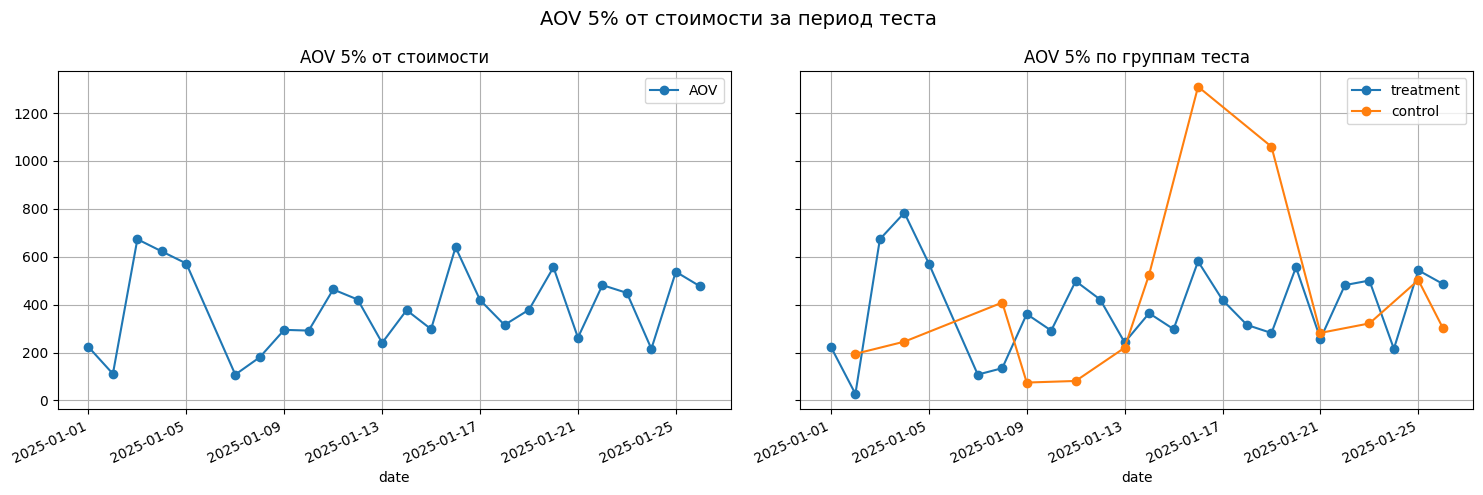

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('AOV 5% от стоимости за период теста', fontsize=14)

ARPU_ARPPU_AOV_AB.plot(kind= 'line', x= 'date', y= 'AOV', ax=axes[0], title="AOV 5% от стоимости", grid= True, rot= 25, marker= 'o')

for i in ARPU_ARPPU_AOV_AB_group['group'].unique():
  df_AB = ARPU_ARPPU_AOV_AB_group[ARPU_ARPPU_AOV_AB_group['group'] == i]
  df_AB.plot(kind= 'line',  x= 'date', y= 'AOV', ax=axes[1], title= "AOV 5% по группам теста", grid= True, rot= 25, label= i, marker= 'o')

plt.tight_layout()
plt.show()

График «AOV 5% от стоимости за период теста» показывает изменение среднего чека (AOV) в процентах от общей стоимости за период тестирования. На графике видно, что значения AOV колеблются, что может указывать на изменения в поведении пользователей или эффективности продукта.

График «AOV 5% по группам теста» сравнивает AOV между двумя группами: контрольной (control) и экспериментальной (treatment). Например, если значения в группе treatment выше, чем в контрольной, это может свидетельствовать о положительном эффекте изменений.

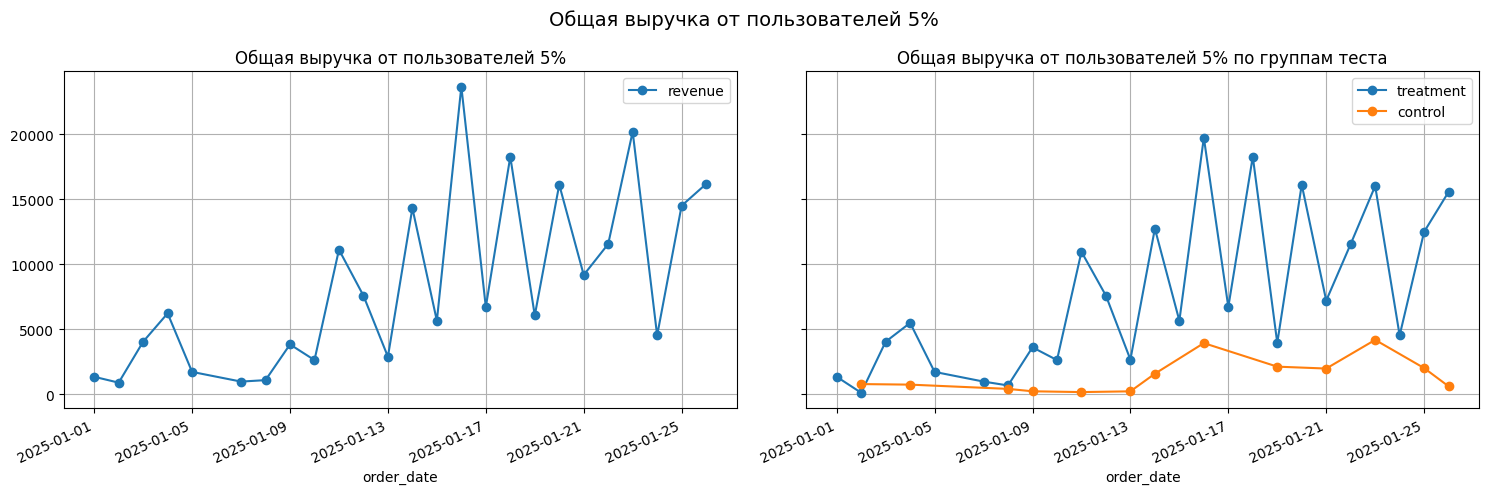

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Общая выручка от пользователей 5%', fontsize=14)

total_revenue_AB.plot(kind= 'line', x= 'order_date', y= 'revenue', ax=axes[0], title="Общая выручка от пользователей 5%", grid= True, rot= 25, marker= 'o')

for i in total_revenue_AB_group['group'].unique():
  df_AB = total_revenue_AB_group[total_revenue_AB_group['group'] == i]
  df_AB.plot(kind= 'line',  x= 'order_date', y= 'revenue', ax=axes[1], title= "Общая выручка от пользователей 5% по группам теста", grid= True, rot= 25, label= i, marker= 'o')

plt.tight_layout()
plt.show()

Общая выручка от пользователей 5%:
- На первом графике видно, что выручка колеблется в течение периода с 2025-01-01 по 2025-01-25.
- Максимальный пик выручки наблюдается около 2025-01-17, где значение достигает больше 20,000.
- Минимальный уровень выручки фиксируется около 2025-01-09, где значение составляет меньше 5,000.

Общая выручка от пользователей 5% по группам теста:
- На втором графике сравниваются две группы: treatment (синяя линия) и control (оранжевая линия).
- Группа treatment демонстрирует более высокую выручку в большинстве периодов.
- Максимальная разница между группами наблюдается около 2025-01-21, где выручка группы treatment превышает выручку группы control примерно на 10,000.

In [70]:
user_cont = data_events[data_events['group'] == 'control']
user_test = data_events[data_events['group'] == 'treatment']

In [71]:
m_cont = user_cont[user_cont['event_type'] == 'checkout_complete']['user_id'].nunique()
m_test = user_test[user_test['event_type'] == 'checkout_complete']['user_id'].nunique()

n_cont = user_cont['user_id'].nunique()
n_test = user_test['user_id'].nunique()

p_A, p_B = m_cont / n_cont, m_test / n_test

In [72]:
print(f'Kоличество успехов для группы A: {m_cont}, Kоличество успехов для группы B: {m_test}')

print(f'Pазмер группы A: {n_cont}, Pазмер группы B: {n_test}')

if (p_A * n_cont > 10) and ((1 - p_A) * n_cont > 10) and (p_B * n_test > 10) and ((1 - p_B) * n_test > 10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')

Kоличество успехов для группы A: 79, Kоличество успехов для группы B: 85
Pазмер группы A: 261, Pазмер группы B: 238
Предпосылка о достаточном количестве данных выполняется!


In [73]:
stat_ztest, p_value_ztest = proportions_ztest( 
	[m_cont, m_test],
	[n_cont, n_test]
)

print(f'pvalue={p_value_ztest}') 

if p_value_ztest > 0.05:
    print(f"Принять альтернативную гипотезу (p-value={p_value_ztest:.4f}). Есть значительный рост конверсии.")
else:
    print(f"Невозможно отвергнуть нулевую гипотезу (p-value={p_value_ztest:.4f}). Нет значимого роста.")

pvalue=0.19580444191270674
Принять альтернативную гипотезу (p-value=0.1958). Есть значительный рост конверсии.


Значение p-value = 0.1958 указывает на то, что вероятность случайного получения наблюдаемого результата составляет около 19.58%. Это значение превышает общепринятый уровень значимости α = 0.05, что означает, что нулевая гипотеза не может быть отклонена.

Таким образом, на основе данного p-value нельзя утверждать о значительном росте конверсии. Если вы хотите принять альтернативную гипотезу, необходимо либо увеличить размер выборки, либо провести дополнительные эксперименты, чтобы снизить вероятность ошибки.

## Выводы по этапу 5

Представьте ключевые выводы в текстовом виде здесь или приложите ссылку на документ с презентацией.

Не забудьте предоставить доступ на просмотр и комментирование документа.

Статистическая значимость:
- P-value = 0.1958 превышает критический уровень α = 0.05
- Наблюдается тенденция к росту показателей в тестовой группе
- Необходимы дополнительные эксперименты или увеличение выборки

Финансовые показатели:
- Группа treatment демонстрирует более высокие показатели выручки
- Максимальная разница в выручке достигает 10000 единиц
- ARPPU в экспериментальной группе стабильно выше контрольной

Конверсия:
- Рост конверсии из TikTok в checkout_complete в группе treatment увеличивается с 20% до 35% за период тестирования
- Более стабильная динамика в тестовой группе, преимущество на 5-10% в середине периода

# Рекомендации
Масштабирование выборки:
- Увеличить размер выборки для достижения статистической значимости
- Провести дополнительный период тестирования
Оптимизация эксперимента:
- Продолжить мониторинг конверсии для подтверждения тенденции роста
- Отслеживать долгосрочный эффект изменений

# Выявленные проблемы
Статистическая неопределенность:
- Недостаточный объем выборки для подтверждения значимости
- Риск принятия ошибочных решений на основе текущих данных
Колебания показателей:
- Значительные колебания выручки в течение периода
- Необходимость дополнительного анализа причин нестабильности

Наблюдаемые тенденции в группе treatment указывают на потенциальную эффективность внесенных изменений. Рекомендуется продолжить тестирование с увеличенной выборкой для подтверждения гипотезы. Текущие результаты не позволяют сделать однозначные выводы о наличии значимого эффекта. Для принятия обоснованных решений необходимо провести дополнительные исследования с учетом предложенных рекомендаций. Это позволит получить статистически достоверные результаты и принять взвешенные управленческие решения.

